<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline (Version 1.0): 2020-12-03 17:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

# A. THÔNG TIN CHUNG

### Your information:
- Fullname: Doan Minh Hieu
- Date of birth: 18-08-1993
- Place of birth: Phu Yen
- Email: dmhieu93@gmail.com
- Mobile phone: 097 113 8967

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3. Mức độ rủi ro -3 là ít rủi ro nhất.
2. normalized-losses: continuous from 65 to 256. - tổn thất bảo trì/ bảo dưỡng
3. make: - hãng xe
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas. - dạng nhiên liệu
5. aspiration: std, turbo. - động cơ standard hay turbo
6. num-of-doors: four, two. - số cửa
7. body-style: hardtop, wagon, sedan, hatchback, convertible. - kiểu dáng xe
8. drive-wheels: 4wd, fwd, rwd. 4 wheel, front wheel hay rear wheel drive.
9. engine-location: front, rear. - vị trí động cơ
10. wheel-base: continuous from 86.6 120.9. - Khoảng cách tâm 2 bánh xe
11. length: continuous from 141.1 to 208.1. - chiều dài xe
12. width: continuous from 60.3 to 72.3. - chiều rộng xe
13. height: continuous from 47.8 to 59.8. - chiều cao xe
14. curb-weight: continuous from 1488 to 4066. - Cân nặng xe không tải
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. - loại động cơ
16. num-of-cylinders: eight, five, four, six, three, twelve, two. - số cylinders
17. engine-size: continuous from 61 to 326. - kích thước động cơ
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.  - hệ thống nhiên liệu
19. bore: continuous from 2.54 to 3.94. - đường kính trong pittong
20. stroke: continuous from 2.07 to 4.17. - chiều dài hành trình pittong
21. compression-ratio: continuous from 7 to 23. - tỷ số nén
22. horsepower: continuous from 48 to 288. - công suất
23. peak-rpm: continuous from 4150 to 6600. - vòng quay tối đa
24. city-mpg: continuous from 13 to 49. - mpg: miles per gallon : lượng tiêu tốn nhiên liệu đi trong tp
25. highway-mpg: continuous from 16 to 54. - lượng tiêu tốn nhiên liệu đi cao tốc
26. price: continuous from 5118 to 45400. - giá xe

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,model_selection
import warnings
warnings.filterwarnings('ignore')

# B. EXPLORATION DATA

In [3]:
# path_Automobile = '/content/drive/MyDrive/Colab Notebooks/LDS5 - TienXuLy/Cuoi khoa/LDS5_262_Project_1_FullName/imports_85.csv'
columns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style",
           "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight",
           "engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio",
           "horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [4]:
df_Automobile = pd.read_csv("imports_85.csv",header=None,skipinitialspace=True)  # skipinitialspace=True : loai bo khoang trang trong ten các columns
df_Automobile.columns = columns
df_Automobile.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df_Automobile.shape

(205, 26)

In [6]:
df_Automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [7]:
df_Automobile.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [8]:
#Kiểm tra dữ liệu trùng
df_Automobile.loc[df_Automobile.duplicated()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


#### Nhận xét sơ bộ
1. Input: != price
2. Output: price
3. Các kiểu dữ liệu: int64, float64, object
4. Không có biến nào có dữ liệu nào bị null
5. Không có dữ liệu nào bị trùng nhau

-- CV tiếp theo :
1. Xác định biến nào là dữ liệu số (định lượng) và object (định tính)
2. Trong các dữ liệu số biến nào là biến phân loại và biến nào là biến liên tục.
3. Lưu ý các biến object cũng có thể là dữ liệu số nhưng bị lẫn các kí tự đặc biệt.

In [9]:
obj = [f for f in df_Automobile.columns if df_Automobile.dtypes[f] == 'object'] 
i = 1
for o in obj:
  print(i,"./ ",o," ",len(df_Automobile[o].unique())," : ",df_Automobile[o].unique())
  i=i+1

1 ./  normalized_losses   52  :  ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
2 ./  make   22  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
3 ./  fuel_type   2  :  ['gas' 'diesel']
4 ./  aspiration   2  :  ['std' 'turbo']
5 ./  num_of_doors   3  :  ['two' 'four' '?']
6 ./  body_style   5  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7 ./  drive_wheels   3  :  ['rwd' 'fwd' '4wd']
8 ./  engine_location   2  :  ['front' 'rear']
9 ./  engine_type   7  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
10 ./  num_of_cylinders   7  :  ['four' 'six' 'five

#### Nhận xét
1. các biến ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"] là biến định lượng nhưng có kí tự đặc biệt là "?"
=> cần xử lý dấu "?"
2. Biến num-of-doors là biến định tính nhưng có kí tự đặc biệt => cần xử lý dấu "?"

In [10]:
nums = [f for f in df_Automobile.columns if df_Automobile.dtypes[f] != 'object']
i = 1 
for n in nums:
  print(i,"./",n," ",len(df_Automobile[n].unique())," : ",df_Automobile[n].unique() if len(df_Automobile[n].unique())<20 else "")
  i=i+1

1 ./ symboling   6  :  [ 3  1  2  0 -1 -2]
2 ./ wheel_base   53  :  
3 ./ length   75  :  
4 ./ width   44  :  
5 ./ height   49  :  
6 ./ curb_weight   171  :  
7 ./ engine_size   44  :  
8 ./ compression_ratio   32  :  
9 ./ city_mpg   29  :  
10 ./ highway_mpg   30  :  


In [11]:
# xử lý các biến định lượng có ký tự đặc biệt
lst_xu_ly = ["normalized_losses","bore","stroke","horsepower","peak_rpm","price"]
for i in lst_xu_ly:
    t = df_Automobile[i].loc[df_Automobile[i]=="?"].count()
    print("số kí tự '?' trong biến",i,"là : ",t)

số kí tự '?' trong biến normalized_losses là :  41
số kí tự '?' trong biến bore là :  4
số kí tự '?' trong biến stroke là :  4
số kí tự '?' trong biến horsepower là :  2
số kí tự '?' trong biến peak_rpm là :  2
số kí tự '?' trong biến price là :  4


In [12]:
for i in lst_xu_ly:
    mean = df_Automobile[i].loc[df_Automobile[i]!="?"].astype(float).mean()
    df_Automobile[i] = df_Automobile[i].replace("?",mean).astype(float)

df_Automobile.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
# Xử lý biến định tính có ký tự đặc biệt ["num-of-doors"]
t = df_Automobile["num_of_doors"].loc[df_Automobile["num_of_doors"]=="?"].count()
df_Automobile.loc[df_Automobile["num_of_doors"]=="?"]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [14]:
# Kiểm tra xem các dòng xe tương tự có số cửa bao nhiêu để thay thế vào ký tự đặc biệt
# ta thử kiểm tra bằng các biến có 2~3 giá trị giống số lượng cửa 2 cửa / 4 cửa
df_num_door_1 = df_Automobile.loc[df_Automobile["fuel_type"]=="gas"].loc[df_Automobile["aspiration"]=="turbo"].loc[df_Automobile["make"]=="dodge"]
df_num_door_2 = df_Automobile.loc[df_Automobile["fuel_type"]=="diesel"].loc[df_Automobile["aspiration"]=="std"].loc[df_Automobile["make"]=="mazda"]
print(df_num_door_1["num_of_doors"])
print(df_num_door_2["num_of_doors"])

23    two
27      ?
29    two
Name: num_of_doors, dtype: object
63       ?
66    four
Name: num_of_doors, dtype: object


In [15]:
# ta thấy số lượng cửa của 2 ký tự đặc biệt là 2 cửa và 4 cửa
# => tiến hành replace 2 ký tự đặc biệt
df_Automobile.iloc[27, df_Automobile.columns.get_loc('num_of_doors')] = "two"
df_Automobile.iloc[63, df_Automobile.columns.get_loc('num_of_doors')] = "four"

#### chạy lại các biến

In [16]:
obj = [f for f in df_Automobile.columns if df_Automobile.dtypes[f] == 'object'] 
i = 1
for o in obj:
  print(i,"./ ",o," ",len(df_Automobile[o].unique())," : ",df_Automobile[o].unique())
  i=i+1

1 ./  make   22  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
2 ./  fuel_type   2  :  ['gas' 'diesel']
3 ./  aspiration   2  :  ['std' 'turbo']
4 ./  num_of_doors   2  :  ['two' 'four']
5 ./  body_style   5  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
6 ./  drive_wheels   3  :  ['rwd' 'fwd' '4wd']
7 ./  engine_location   2  :  ['front' 'rear']
8 ./  engine_type   7  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
9 ./  num_of_cylinders   7  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
10 ./  fuel_system   8  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [17]:
nums = [f for f in df_Automobile.columns if df_Automobile.dtypes[f] != 'object']
i = 1 
for n in nums:
  print(i,"./",n," ",len(df_Automobile[n].unique())," : ",df_Automobile[n].unique() if len(df_Automobile[n].unique())<20 else "")
  i=i+1

1 ./ symboling   6  :  [ 3  1  2  0 -1 -2]
2 ./ normalized_losses   51  :  
3 ./ wheel_base   53  :  
4 ./ length   75  :  
5 ./ width   44  :  
6 ./ height   49  :  
7 ./ curb_weight   171  :  
8 ./ engine_size   44  :  
9 ./ bore   39  :  
10 ./ stroke   37  :  
11 ./ compression_ratio   32  :  
12 ./ horsepower   60  :  
13 ./ peak_rpm   24  :  
14 ./ city_mpg   29  :  
15 ./ highway_mpg   30  :  
16 ./ price   187  :  


#### Nhận xét:
1. Có 10 biến định tính ['make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type',
 'num-of-cylinders', 'fuel-system']
2. 16 biến định lượng
3. Ngoại trừ biến symboling là biến định lượng phân loại còn lại đều là biến định lượng liên tục.
['normalized-losses','wheel-base','length','width',
 'height','curb-weight','engine-size','bore', 'stroke','compression-ratio','horsepower','peak-rpm',
 'city-mpg','highway-mpg','price']
4. Kết hợp với ko có giá trị nào null nên các biến định lượng tạm thời hợp lệ => ta sẽ kiểm tra outlier để xem có loại hay ko sau.

-- Công việc tiếp theo
1. Phân tích đơn biến
  _ conti: lst_conti = ['normalized_losses','wheel_base','length','width', 'height','curb_weight','engine_size','bore', 'stroke','compression_ratio',horsepower','peak_rpm', 'city_mpg',             'highway_mpg','price']
    + Xem xu hướng trung tâm và phân tán của dữ liệu(describe, median, mode, iqr, knew, kurt, var, std)
    + Sử dụng hist/distplot, kdeplot, boxplot để quan sát dữ liệu
    + Xem boxplot để loại outlier > 1.5*iqr
    + Lưu ý kiểm tra kỹ outlier và xem tỷ lệ outlier trước khi loại.
  _ categ:
    + Đếm số lg ptu các nhóm
    + Sử dụng barplot để quan sát dữ liệu
  _ Vẽ đồ thị xem mức độ ảnh hưởng của các biến đơn đối với mức giá. => đưa ra nhận xét

2. Phân tích 2 biến:
  _ conti vs conti:
    + Sử dụng scatter hoặc pairplot để quan sát dữ liêu
    + Xem hệ số tương quan đưa ra nhận xét
  _ categ vs categ:
    + count() các giá trị trong nhóm bằng crosstab
    + Xem dữ liệu bằng biểu đồ cột chồng hoặc pieplot
    + Sử dụng kiểm định Chi2 để kiểm tra cặp biến phân loại đang xét là phụ thuộc hay độc lập(có ảnh hưởng tới nhau hay không)
  _ conti vs categ:
    + count() các giá trị trong nhóm phân loại bằng crosstab
  _ Xem sự ảnh hưởng của các biến liên quan đến giá trị của xe. => đưa ra nhận xét

# C. PHÂN TÍCH CÁC BIẾN

### Phân tích biến liên tục

In [18]:
lst_conti = ['normalized_losses','wheel_base','length','width', 'height','curb_weight','engine_size',
             'bore', 'stroke','compression_ratio','horsepower','peak_rpm', 'city_mpg',
             'highway_mpg','price']
             
lst_categ = ['make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
              'engine_location','engine_type','num_of_cylinders','fuel_system',"symboling"]


In [19]:
# Mô tả
# INPUT : Nhập vào lst biến liên tục và DataFrame chứa các biến liên tục
# OUTPUT : In ra các thông số cơ bản của biến liên tục
def spec(lst,df):
  t=1
  for i in lst:
    median = df[i].median()
    mean = df[i].mean()
    mode = df[i].mode()
    count1 = df[i].count()
    max1 = max(df[i])
    min1 = min(df[i])
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    iqr = ss.iqr(df[i])
    std = df[i].std()
    var = df[i].var()
    skew = df[i].skew()
    kurt = ss.kurtosis(df[i])
    lst_spec = [median,mean,mode,count1,max1,min1,Q1,Q3,iqr,std,var,skew,kurt]
    lst_label = ["Trung vị: ","Trung bình: ","Mode:","Count: ","Số lớn nhất: ","Số nhỏ nhất: ","Q1","Q3","iqr: ","Độ lệch chuẩn: ","Phương sai: ","Độ lệch: ","Độ nhọn: "]
    print(t,"/ các thông số cơ bản của biến :" ,i)
    t+=1
    for i in range(len(lst_spec)):
        print(lst_label[i],": ", lst_spec[i])
    print("\n")  

In [20]:
import scipy.stats as ss
spec(lst_conti,df_Automobile)

1 / các thông số cơ bản của biến : normalized_losses
Trung vị:  :  122.0
Trung bình:  :  122.0
Mode: :  0    122.0
dtype: float64
Count:  :  205
Số lớn nhất:  :  256.0
Số nhỏ nhất:  :  65.0
Q1 :  101.0
Q3 :  137.0
iqr:  :  36.0
Độ lệch chuẩn:  :  31.6810081043802
Phương sai:  :  1003.6862745098039
Độ lệch:  :  0.8548022766908568
Độ nhọn:  :  1.3414917335004102


2 / các thông số cơ bản của biến : wheel_base
Trung vị:  :  97.0
Trung bình:  :  98.75658536585378
Mode: :  0    94.5
dtype: float64
Count:  :  205
Số lớn nhất:  :  120.9
Số nhỏ nhất:  :  86.6
Q1 :  94.5
Q3 :  102.4
iqr:  :  7.900000000000006
Độ lệch chuẩn:  :  6.021775685025572
Phương sai:  :  36.2617824007652
Độ lệch:  :  1.0502137758714858
Độ nhọn:  :  0.9632757242326453


3 / các thông số cơ bản của biến : length
Trung vị:  :  173.2
Trung bình:  :  174.04926829268305
Mode: :  0    157.3
dtype: float64
Count:  :  205
Số lớn nhất:  :  208.1
Số nhỏ nhất:  :  141.1
Q1 :  166.3
Q3 :  183.1
iqr:  :  16.799999999999983
Độ lệch chu

In [21]:
# Mô hình hóa dữ liệu & xem số lượng outlier
# Mô tả:
# Input : nhập vào list biến liên tục và DataFrame chứa các biến đó
# Output : - vẽ đồ thị distribution, biểu đồ histogram và box plot của  biến liên tục
#          - Đếm số outlier và in ra các outlier hiện có
def Visua_conti(lst,df):
  t=1
  for i in lst:
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title("Biểu đồ distribution")
    sns.distplot(df[i])
    plt.subplot(222)
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title("Biểu đồ histogram")
    plt.suptitle(str(t)+"/ Biểu đồ của biến liên tục: " + i,c="red",size="25")
    t+=1
    plt.subplot(2,2,(3,4))
    plt.boxplot(df[i],vert=False)
    plt.show()

    outlier_num_under = df[i][df[i]>(np.percentile(df[i],75)+1.5*ss.iqr(df[i]))]
    outlier_num_lower = df[i][df[i]<(np.percentile(df[i],25)-1.5*ss.iqr(df[i]))]
    outlier_num = outlier_num_under.shape[0] + outlier_num_lower.shape[0]
    if outlier_num > 0:
        print("Biến %s Có %i outlier với %i outlier trên và %i outlier dưới :" %(i,outlier_num,outlier_num_under.shape[0], outlier_num_lower.shape[0])) 
        print("Outlier under:\n",outlier_num_under)
        print("Outlier lower:\n",outlier_num_lower)
        print("\n")
    else:
        print("biến " + i + " không có outlier")
        print("\n")
    print("\n\n")

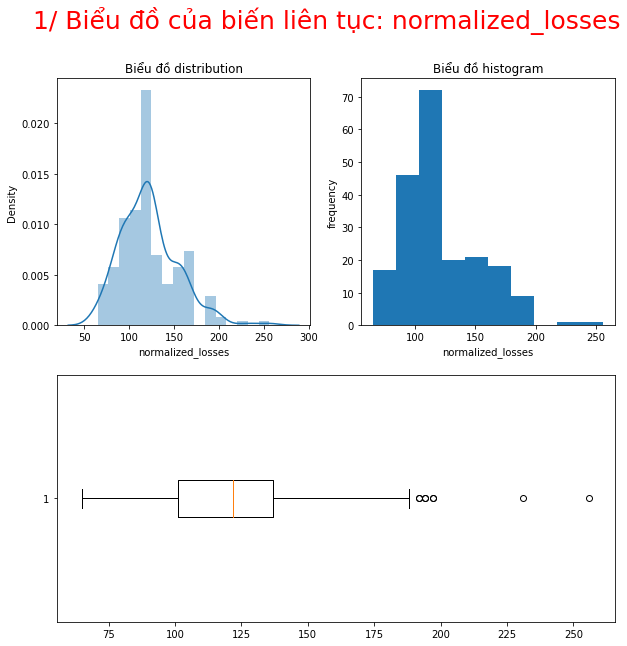

Biến normalized_losses Có 8 outlier với 8 outlier trên và 0 outlier dưới :
Outlier under:
 10     192.0
11     192.0
104    194.0
105    194.0
106    231.0
178    197.0
179    197.0
190    256.0
Name: normalized_losses, dtype: float64
Outlier lower:
 Series([], Name: normalized_losses, dtype: float64)







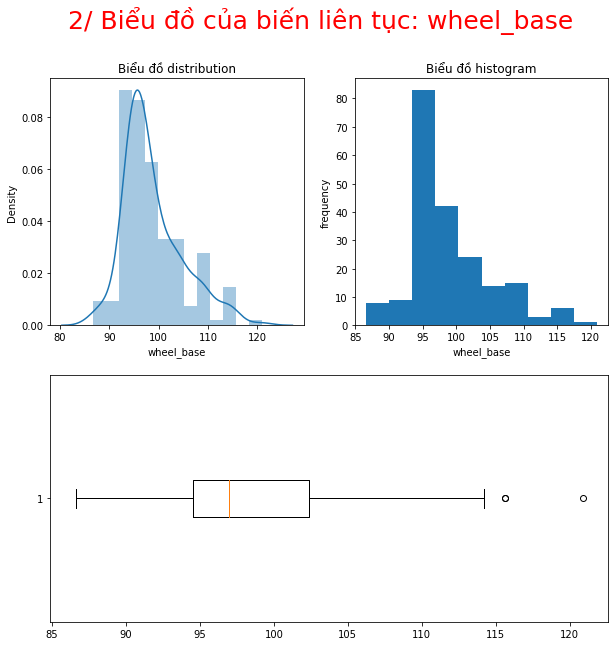

Biến wheel_base Có 3 outlier với 3 outlier trên và 0 outlier dưới :
Outlier under:
 70    115.6
71    115.6
73    120.9
Name: wheel_base, dtype: float64
Outlier lower:
 Series([], Name: wheel_base, dtype: float64)







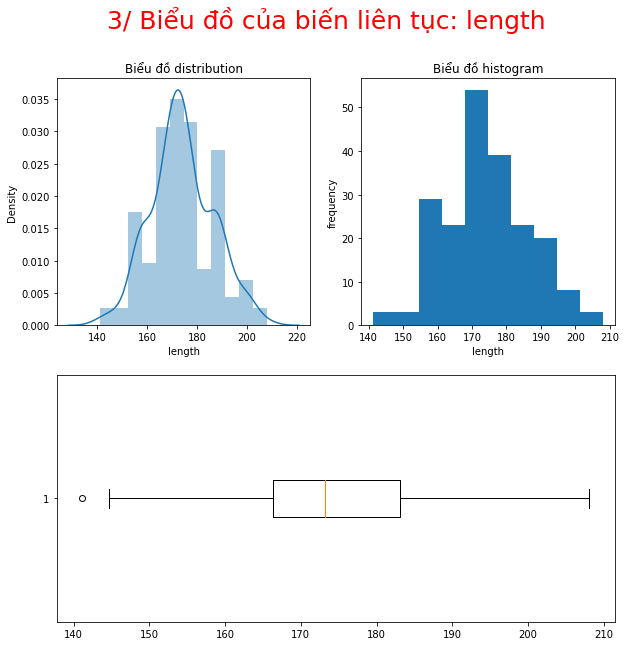

Biến length Có 1 outlier với 0 outlier trên và 1 outlier dưới :
Outlier under:
 Series([], Name: length, dtype: float64)
Outlier lower:
 18    141.1
Name: length, dtype: float64







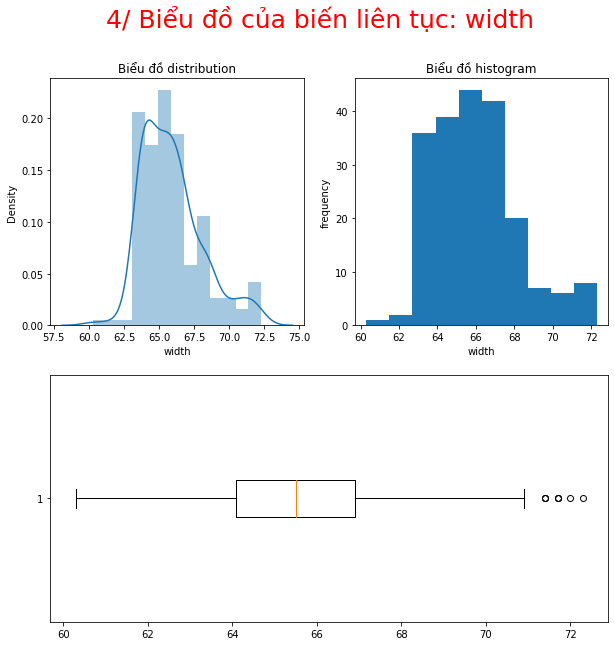

Biến width Có 8 outlier với 8 outlier trên và 0 outlier dưới :
Outlier under:
 6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: width, dtype: float64
Outlier lower:
 Series([], Name: width, dtype: float64)







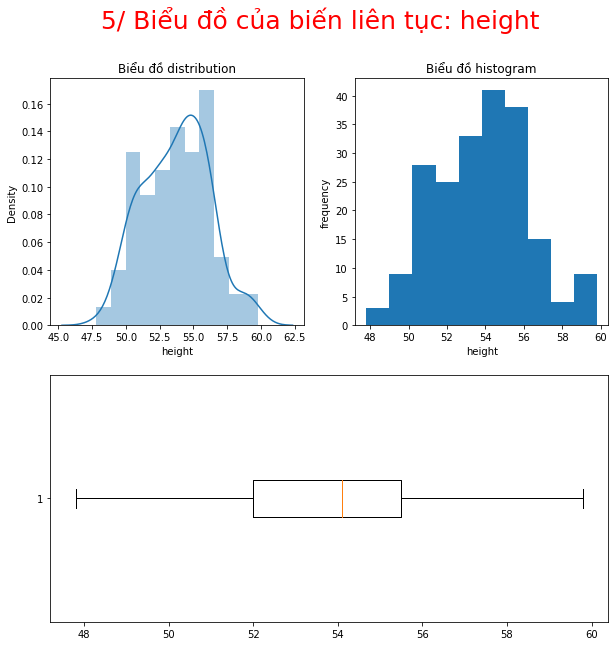

biến height không có outlier







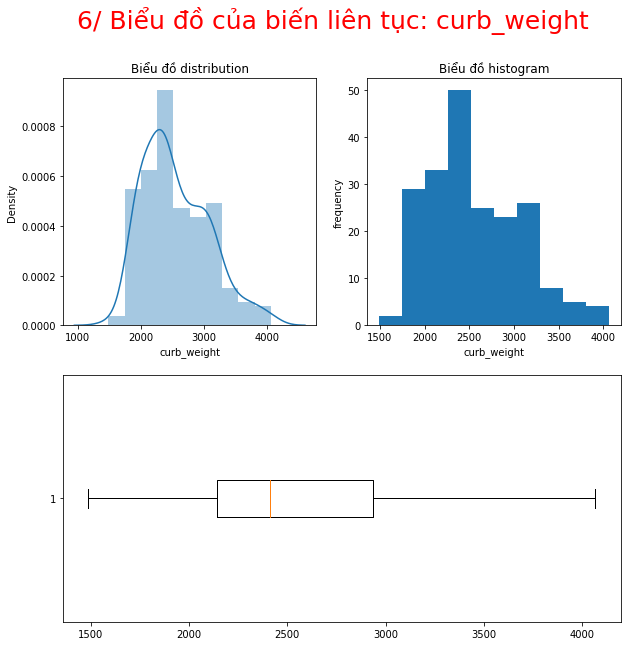

biến curb_weight không có outlier







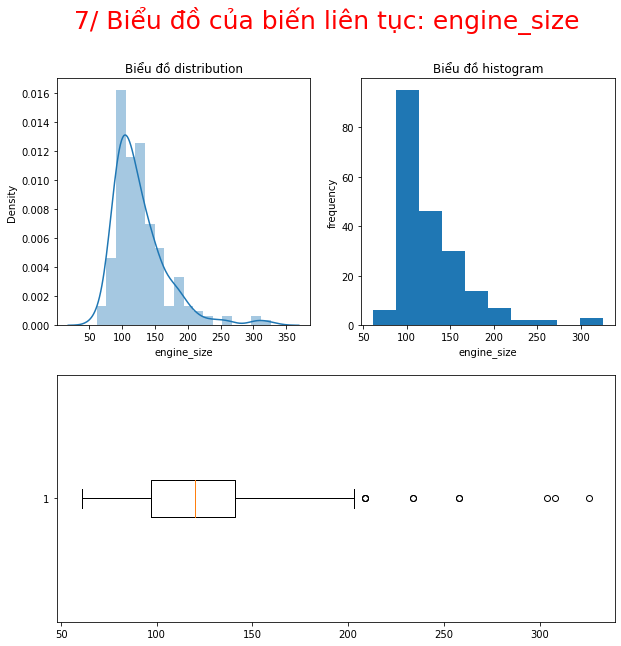

Biến engine_size Có 10 outlier với 10 outlier trên và 0 outlier dưới :
Outlier under:
 15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: engine_size, dtype: int64
Outlier lower:
 Series([], Name: engine_size, dtype: int64)







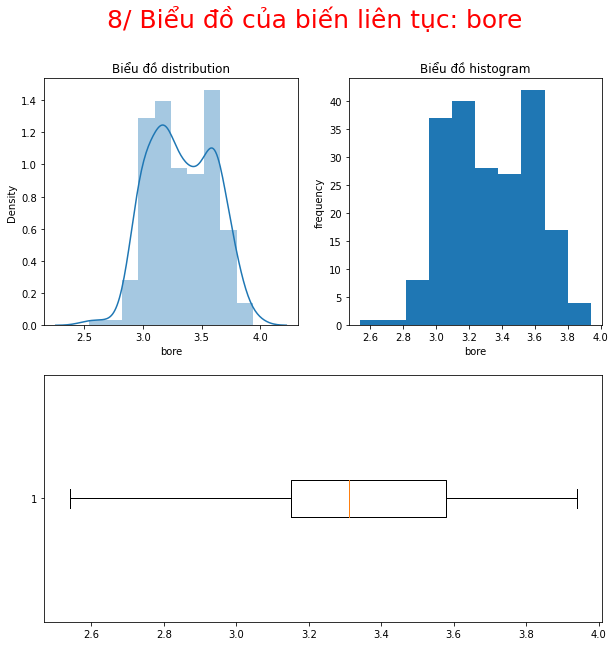

biến bore không có outlier







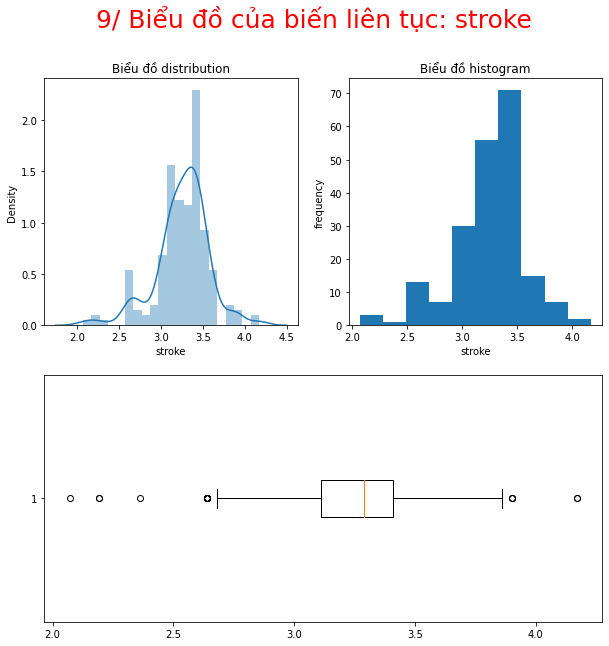

Biến stroke Có 20 outlier với 5 outlier trên và 15 outlier dưới :
Outlier under:
 29     3.90
47     4.17
48     4.17
130    3.90
131    3.90
Name: stroke, dtype: float64
Outlier lower:
 111    2.19
113    2.19
134    2.07
138    2.36
139    2.64
140    2.64
141    2.64
142    2.64
143    2.64
144    2.64
145    2.64
146    2.64
147    2.64
148    2.64
149    2.64
Name: stroke, dtype: float64







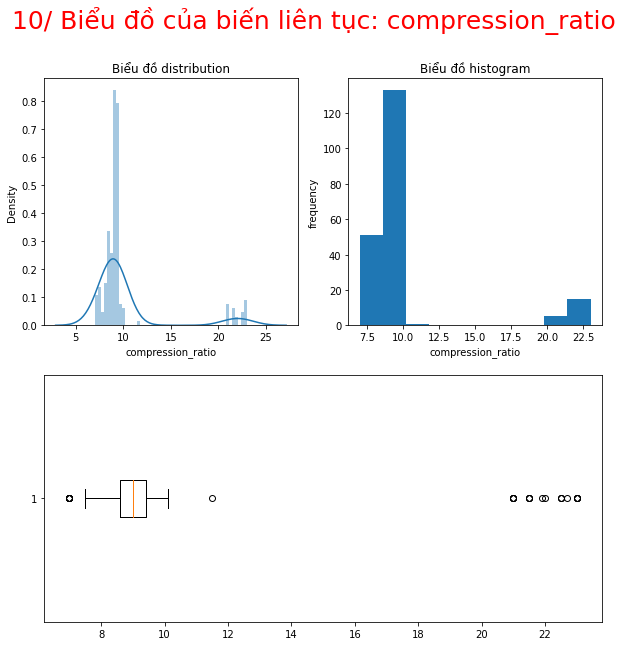

Biến compression_ratio Có 28 outlier với 21 outlier trên và 7 outlier dưới :
Outlier under:
 49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compression_ratio, dtype: float64
Outlier lower:
 9      7.0
29     7.0
82     7.0
83     7.0
84     7.0
117    7.0
124    7.0
Name: compression_ratio, dtype: float64







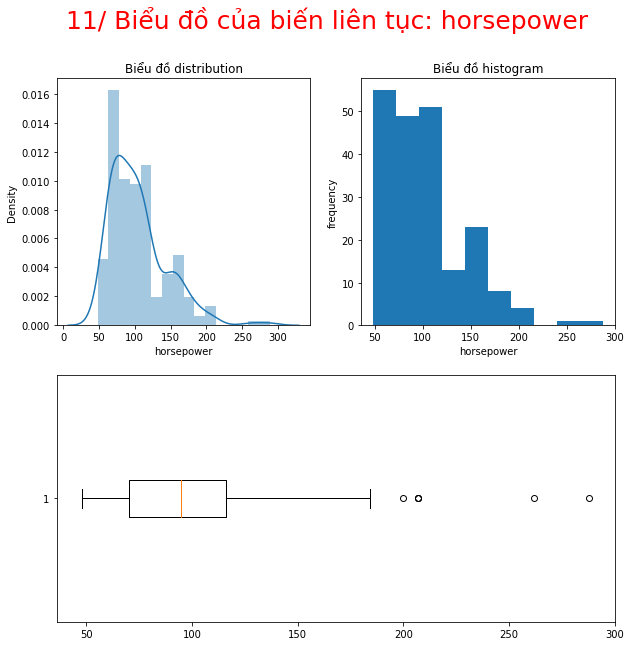

Biến horsepower Có 6 outlier với 6 outlier trên và 0 outlier dưới :
Outlier under:
 49     262.0
105    200.0
126    207.0
127    207.0
128    207.0
129    288.0
Name: horsepower, dtype: float64
Outlier lower:
 Series([], Name: horsepower, dtype: float64)







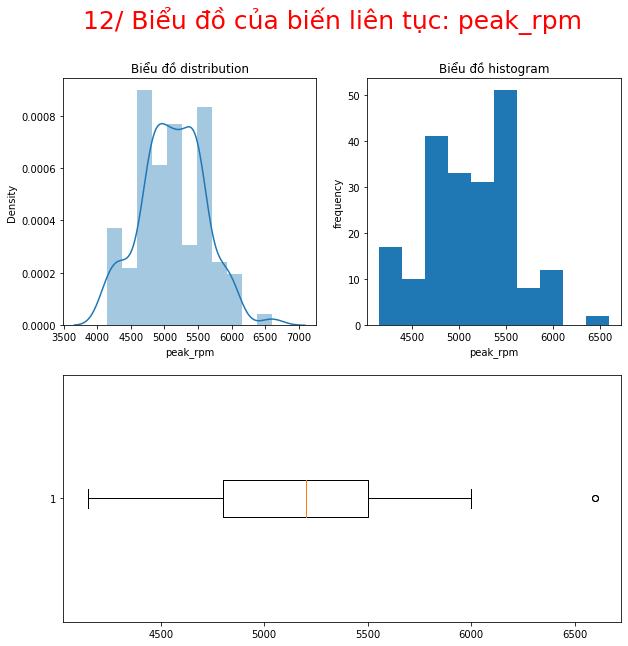

Biến peak_rpm Có 2 outlier với 2 outlier trên và 0 outlier dưới :
Outlier under:
 165    6600.0
166    6600.0
Name: peak_rpm, dtype: float64
Outlier lower:
 Series([], Name: peak_rpm, dtype: float64)







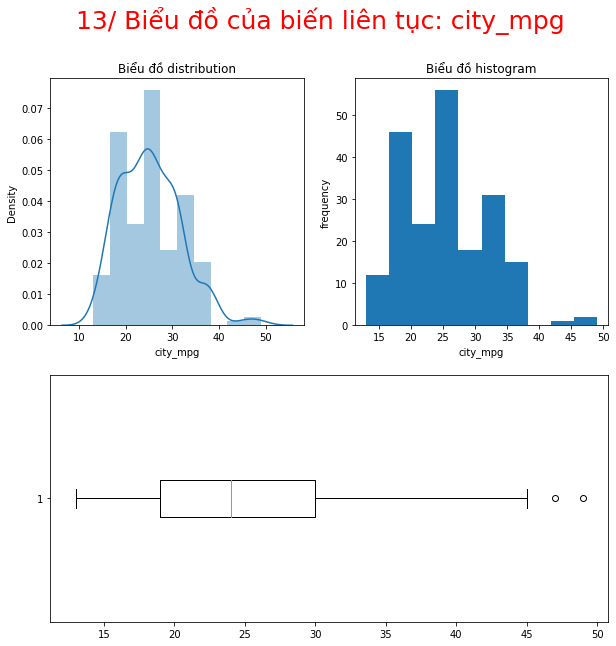

Biến city_mpg Có 2 outlier với 2 outlier trên và 0 outlier dưới :
Outlier under:
 18    47
30    49
Name: city_mpg, dtype: int64
Outlier lower:
 Series([], Name: city_mpg, dtype: int64)







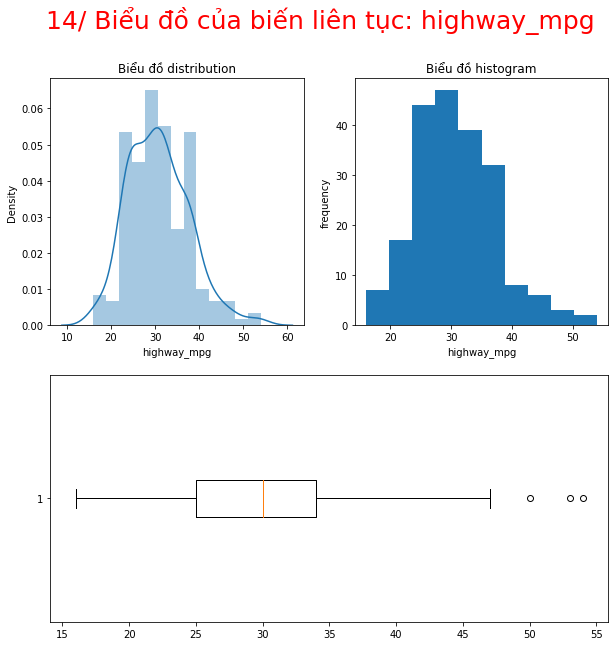

Biến highway_mpg Có 3 outlier với 3 outlier trên và 0 outlier dưới :
Outlier under:
 18    53
30    54
90    50
Name: highway_mpg, dtype: int64
Outlier lower:
 Series([], Name: highway_mpg, dtype: int64)







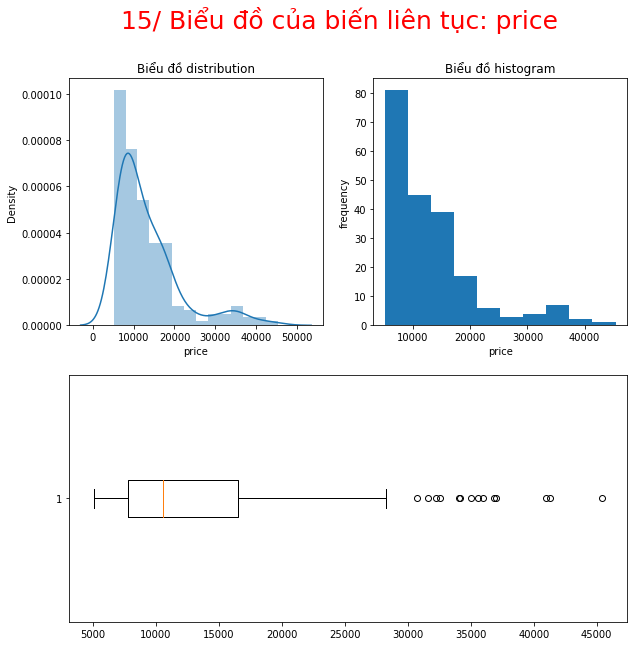

Biến price Có 14 outlier với 14 outlier trên và 0 outlier dưới :
Outlier under:
 15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
Name: price, dtype: float64
Outlier lower:
 Series([], Name: price, dtype: float64)







In [22]:
Visua_conti(lst_conti,df_Automobile)

### Nhận xét với các biến liên tục
  - Với biến Output "Price" :
    - Ta thấy biểu đồ dist lệch phải,median và mean không gần bằng nhau, giá trị của các xe chủ yếu ở khoảng dưới 10k$.
    - Các outlier mặc dù lớn nhưng vẫn là các giá trị hợp lệ nên ta không loại bỏ outlier.

### Phân tích đơn biển biến phân loại
lst_categ = ['make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system','symboling]

In [23]:
df_Automobile[lst_categ].head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,symboling
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,2
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,2


In [24]:
t =1
for i in lst_categ:
  print(t, "/Dư liệu của biến :",i)
  print(df_Automobile[i].value_counts())
  t+=1
  print("\n")

1 /Dư liệu của biến : make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64


2 /Dư liệu của biến : fuel_type
gas       185
diesel     20
Name: fuel_type, dtype: int64


3 /Dư liệu của biến : aspiration
std      168
turbo     37
Name: aspiration, dtype: int64


4 /Dư liệu của biến : num_of_doors
four    115
two      90
Name: num_of_doors, dtype: int64


5 /Dư liệu của biến : body_style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64


6 /Dư liệu của biến : drive_wheels
fwd    120
rwd     76
4wd      9
Name

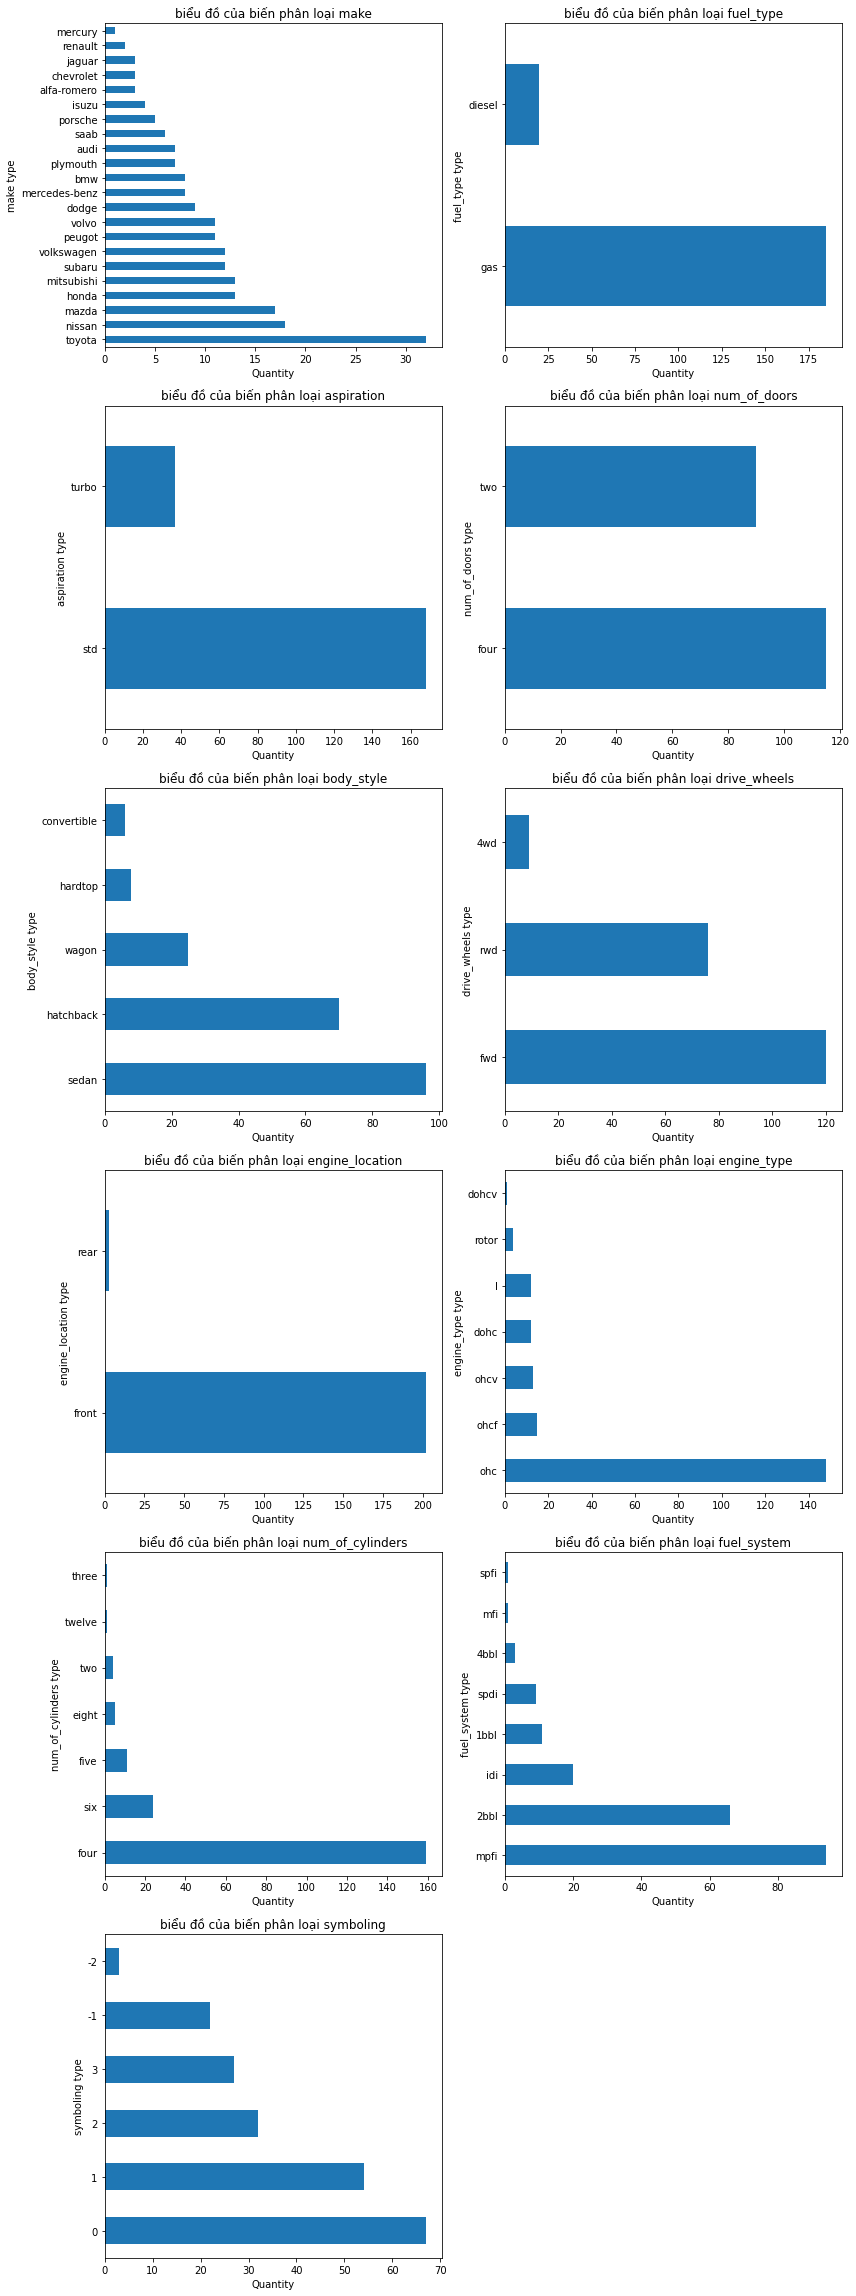

In [25]:
# Mô hình hóa dữ liệu
plt.figure(figsize=(12,32))
k = 1
for i in lst_categ:
  plt.subplot(6,2,k)
  # plt.suptitle("Data visualation for the numerical classification variable \n",fontsize=16,y=1,c="red")
  df_Automobile[i].value_counts().plot(kind="barh")
  plt.title("biểu đồ của biến phân loại "+i)
  plt.ylabel(i+" type")
  plt.xlabel("Quantity")
  # plt.xticks(rotation=45)
  k+=1

plt.tight_layout()
plt.show()


### Nhận xét biến phân loại:
  - Với biến make (nhà sản xuất): số lượng xe nhiều nhất thuộc hãng toyota và ít nhất là của hàng mercucy
  - Các xe chủ yếu sử dụng sử dụng xăng nhiều hơn diezen, ít có xe trang bị động cơ turbo.
  - Phần lớn các dòng xe có body sedan và hatchback. 
  - Chủ yếu sử dụng kiểu động cơ ohc với vị trí động cơ lắp phía trước xe.
  - Động cơ chủ yếu sử dụng 4 cylinder với hệ thống nhiên liệu là rpfi hoặc 2bbl

## Phân tích 2 biến
  - Biến Output là biến liên tục ['price']
  - Đối với biến Input:
    - Ta thấy có 11 biến phân loại: lst_categ = ['symboling','make','fuel_type',aspiration','num_of_doors','body_style',drive_wheels','engine_location','engine_type','num_of_cylinders',fuel_system']
    - 15 biến liên tục: lst_conti = ['normalized-losses','wheel-base','length','width', 'height','curb-weight','engine-size','bore', 'stroke','compression-ratio','horsepower','peak-rpm', 'city-mpg','highway-mpg']

### Biến liên tục Input ảnh hưởng như thế nào đến vs biến liên tục Output price
  - Vẽ đồ thị và đánh giá sơ bộ dữ liệu giữa Input biến liên tục và output price bằng scatter plot.
  - Xem hệ số tương quan để xem độ tương quan của cặp dữ liệu. Tương quan thuận mạnh nếu corr > 0.75 và tương quan nghịch mạnh nếu corr < -0.75
  - Đưa ra nhận xét để chọn biến khi dự đoán mô hình

In [26]:
lst_conti_notprice = ['normalized_losses','wheel_base','length','width', 'height','curb_weight','engine_size',
             'bore', 'stroke','compression_ratio','horsepower','peak_rpm', 'city_mpg',
             'highway_mpg']

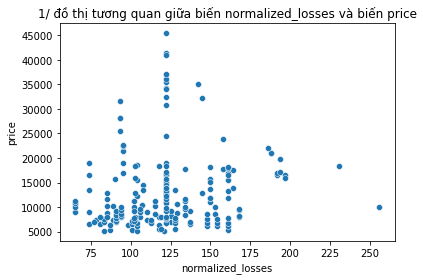

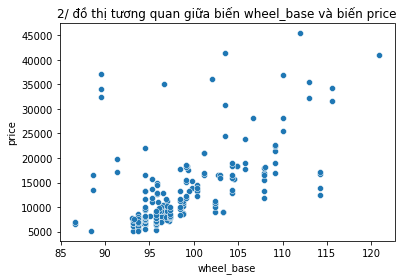

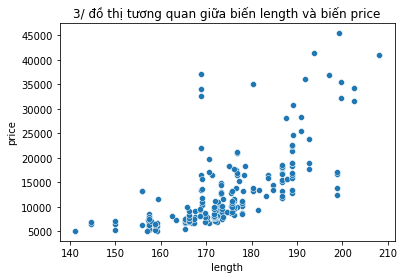

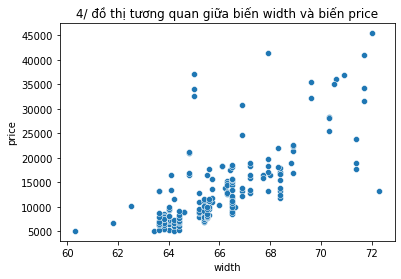

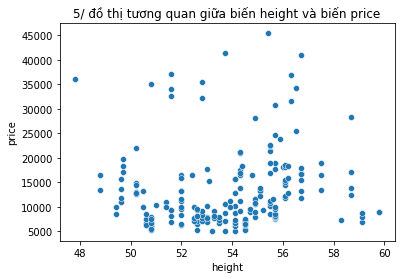

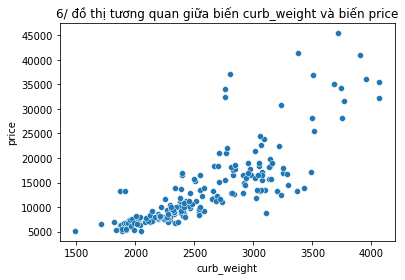

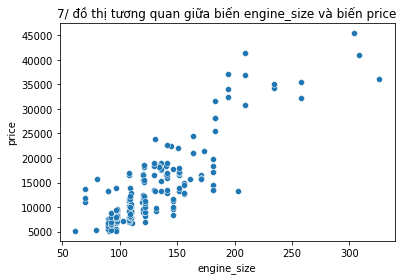

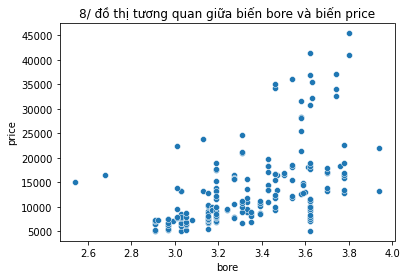

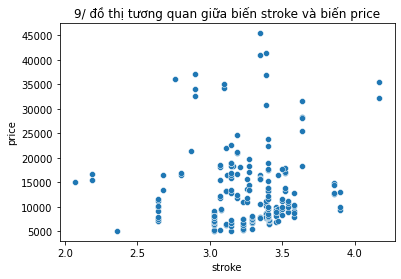

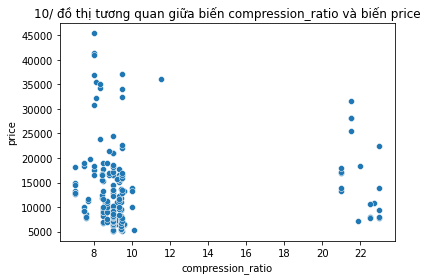

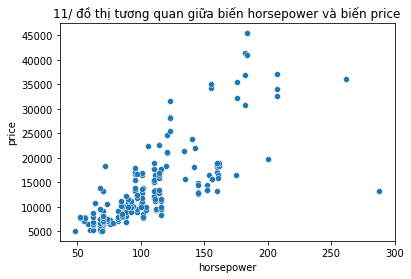

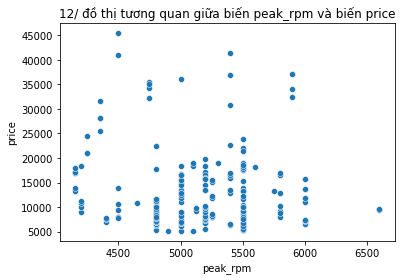

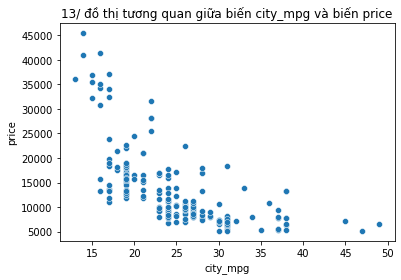

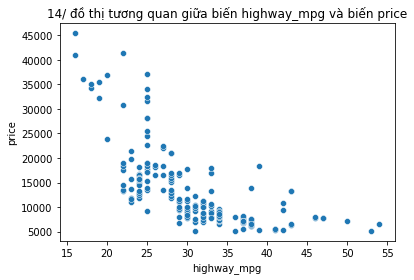

In [27]:
t = 1
for i in lst_conti_notprice:
    sns.scatterplot(x = i, y = 'price', data = df_Automobile[lst_conti])
    plt.title(str(t) + "/ đồ thị tương quan giữa biến " + i + " và biến price")
    t+=1
    plt.show()

In [28]:
# Hệ số tương quan của biến price với các biến liên tục khác
df_Automobile[lst_conti][df_Automobile[lst_conti].columns[1:]].corr()['price'][:-1]

wheel_base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb_weight          0.820825
engine_size          0.861752
bore                 0.532300
stroke               0.082095
compression_ratio    0.070990
horsepower           0.757917
peak_rpm            -0.100854
city_mpg            -0.667449
highway_mpg         -0.690526
Name: price, dtype: float64

### Nhận xét:
  - biến engine-size là biến có mức tương quan cao nhất với biến price ta sẽ thử simple linear với biến này.
  - Qua xem xét mức độ tương quan từ biểu đồ và hệ số tương quan ta nhận thấy có 1 số biến liên tục tương quan thuận mạnh với biến price đó là  ["length","curb-weight","engine-size","horsepower"] và tương quan nghịch mạnh với price là ["city-mgp","highway-mgp"] => ta sẽ thử multi-linear với các biến này.
  - Các biến không có sự tương quan ["height","stroke","compression-ratio","peak-rmp"] ta loại bỏ khi dự đoán mô hình.
  - Cùng với đó là một số các biến tương quan yếu ta để ý đến các biến này để xem xét khi dự đoán mô hình.

#### Xem Các biến phân loại Input sẽ có ảnh hưởng như thế nào tới biến liên tục Output price của xe.
  - Vẽ biểu đồ bar plot và box plot xem dữ liệu của các biến phân loại và biến liên tục price
  - Kiểm định ANOVA xem mức độ tương quan của các cặp biến.


In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

1/ price ảnh hưởng đáng kể tới make Với P_value = 1.0198178532428619e-47


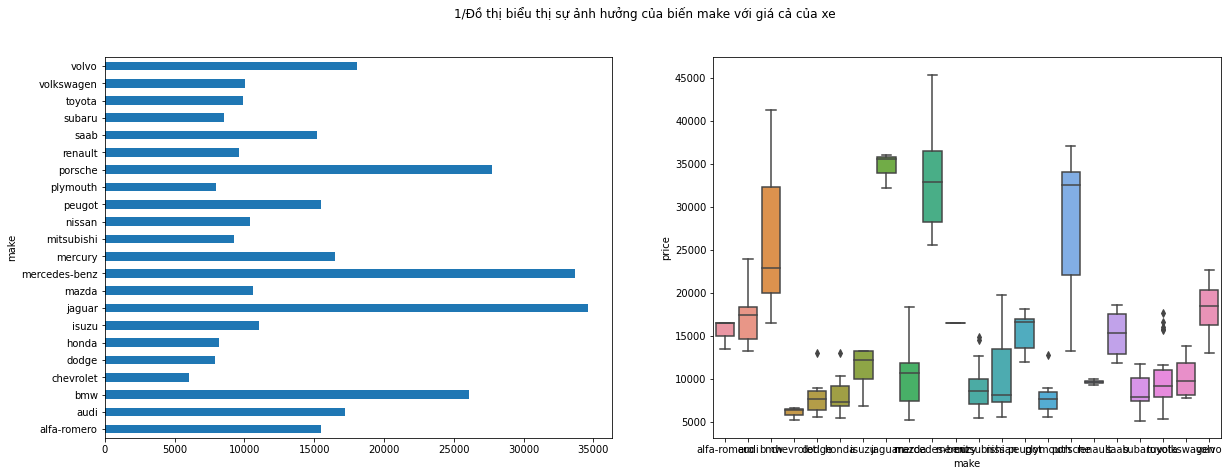

2/ price không ảnh hưởng đáng kể tới fuel_type Với P_value = 0.11570297526361706


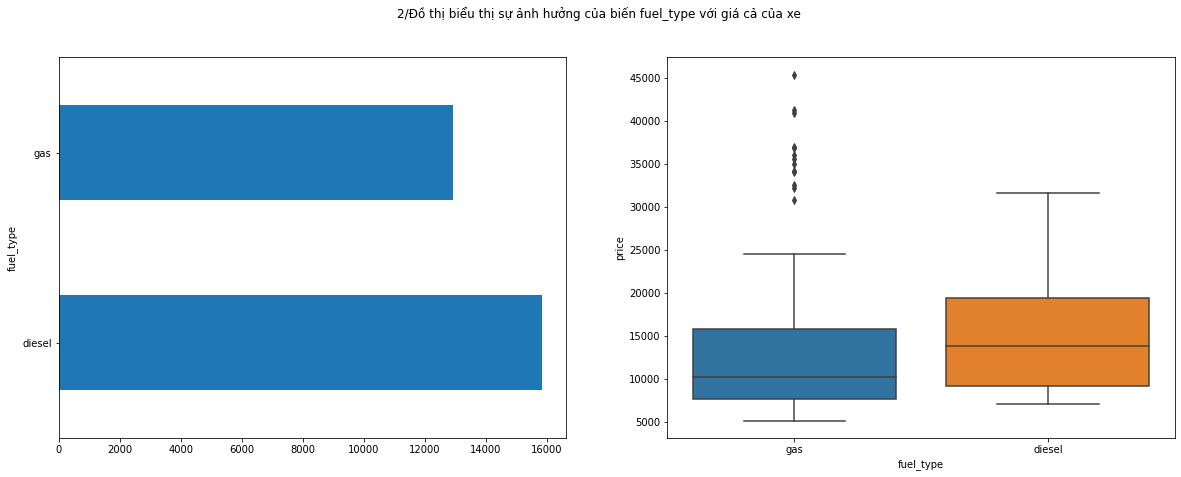

3/ price ảnh hưởng đáng kể tới aspiration Với P_value = 0.010991046478632282


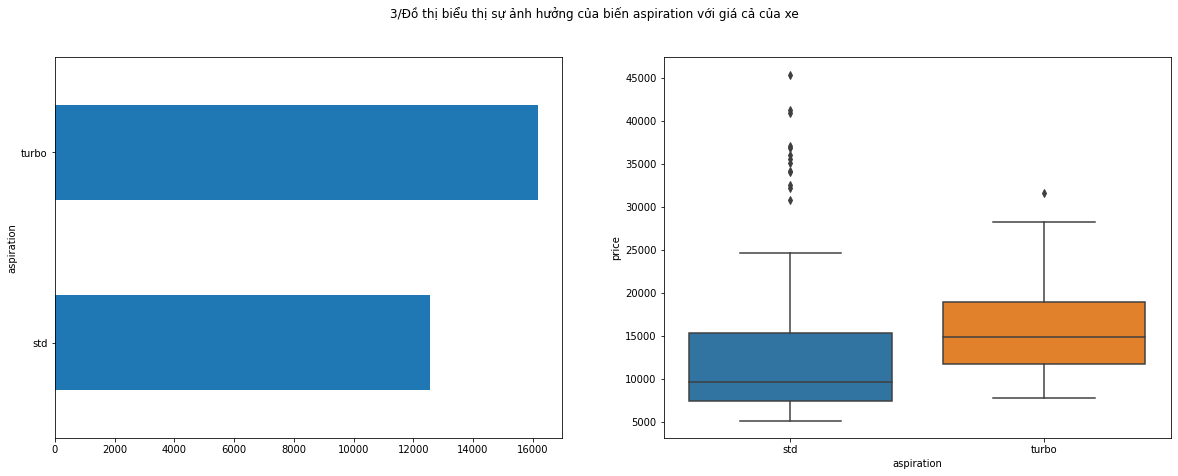

4/ price không ảnh hưởng đáng kể tới num_of_doors Với P_value = 0.49690215327019394


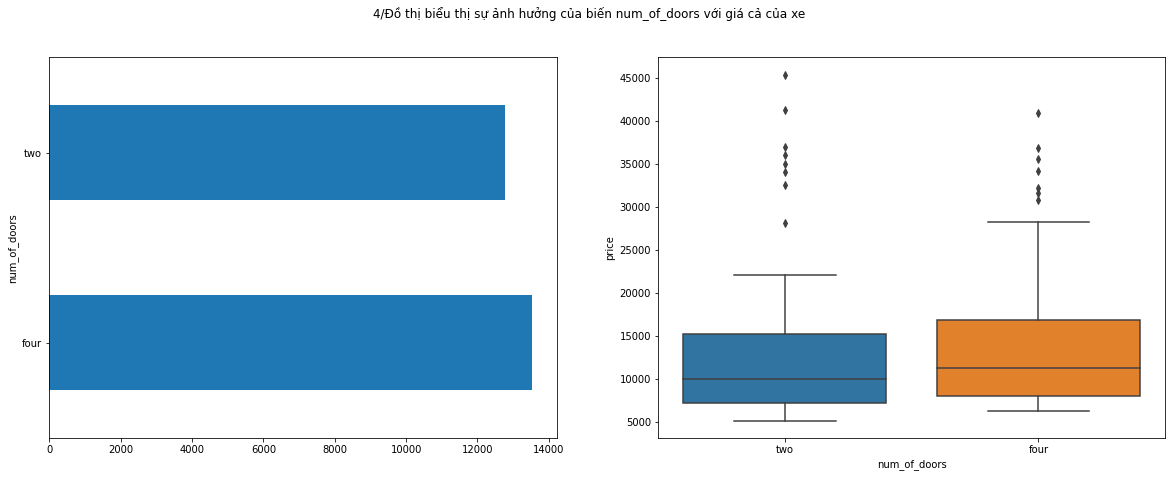

5/ price ảnh hưởng đáng kể tới body_style Với P_value = 7.844575720930169e-07


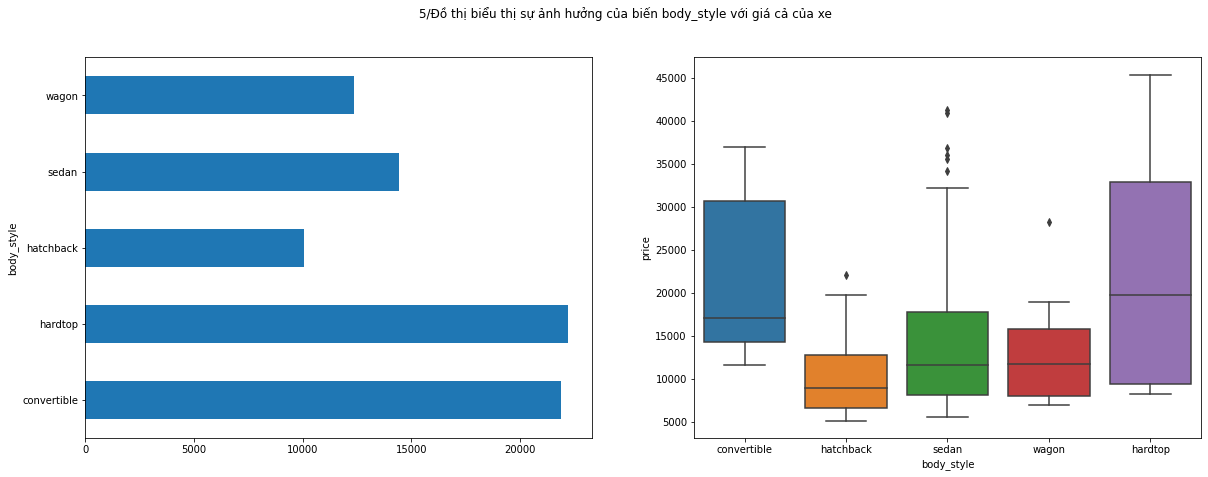

6/ price ảnh hưởng đáng kể tới drive_wheels Với P_value = 3.539270791604393e-23


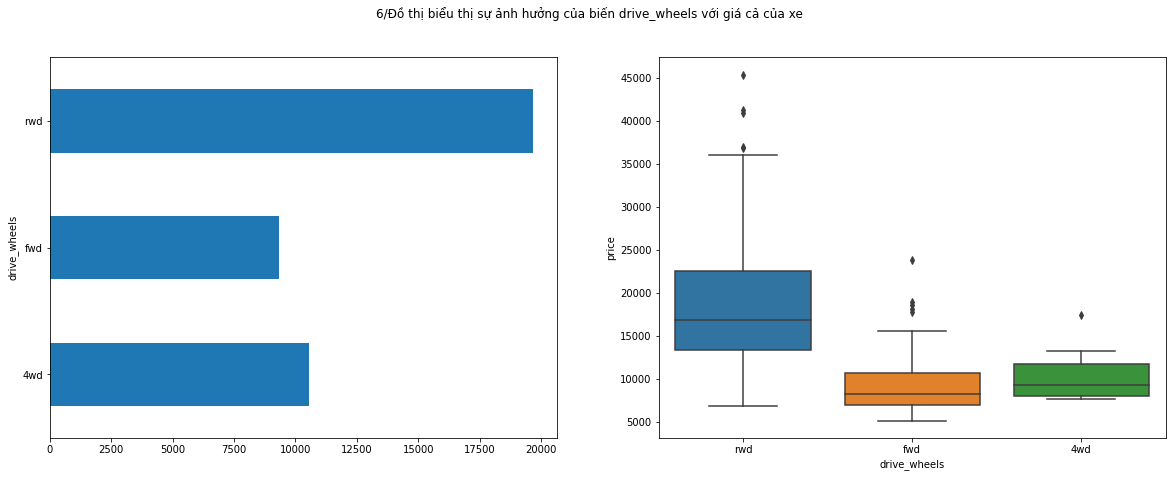

7/ price ảnh hưởng đáng kể tới engine_location Với P_value = 1.2486063656822578e-06


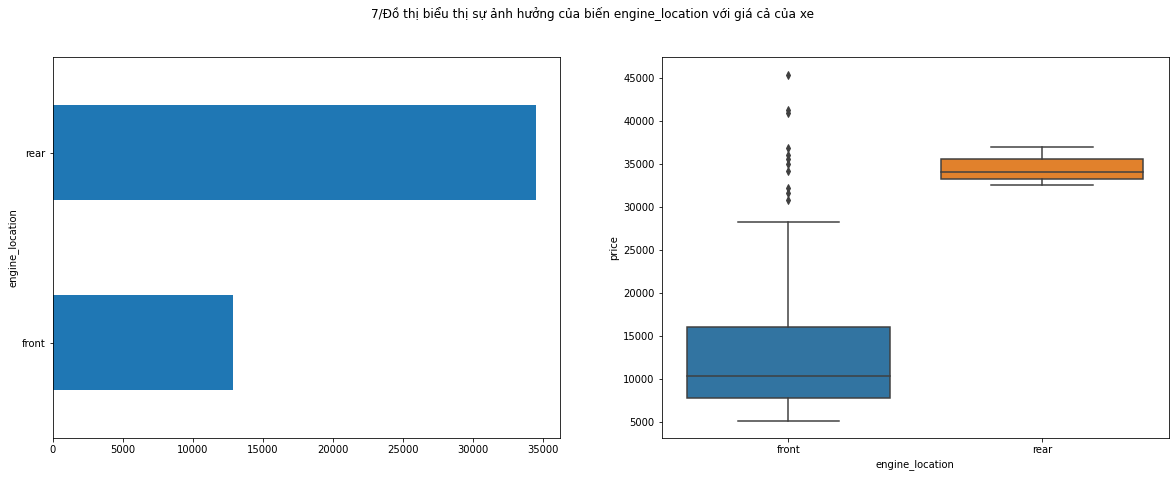

8/ price ảnh hưởng đáng kể tới engine_type Với P_value = 5.008077704895611e-08


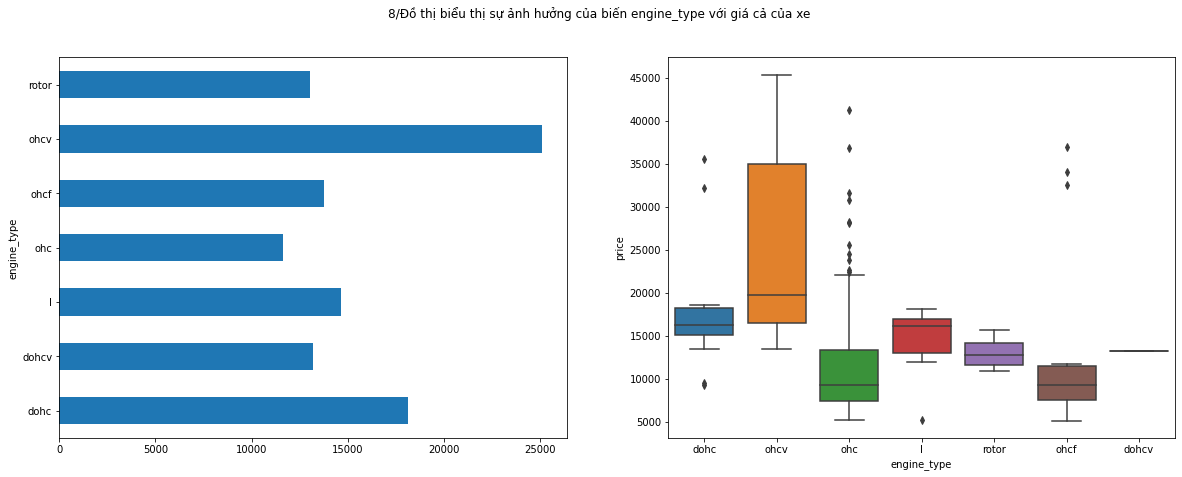

9/ price ảnh hưởng đáng kể tới num_of_cylinders Với P_value = 7.149269882585275e-35


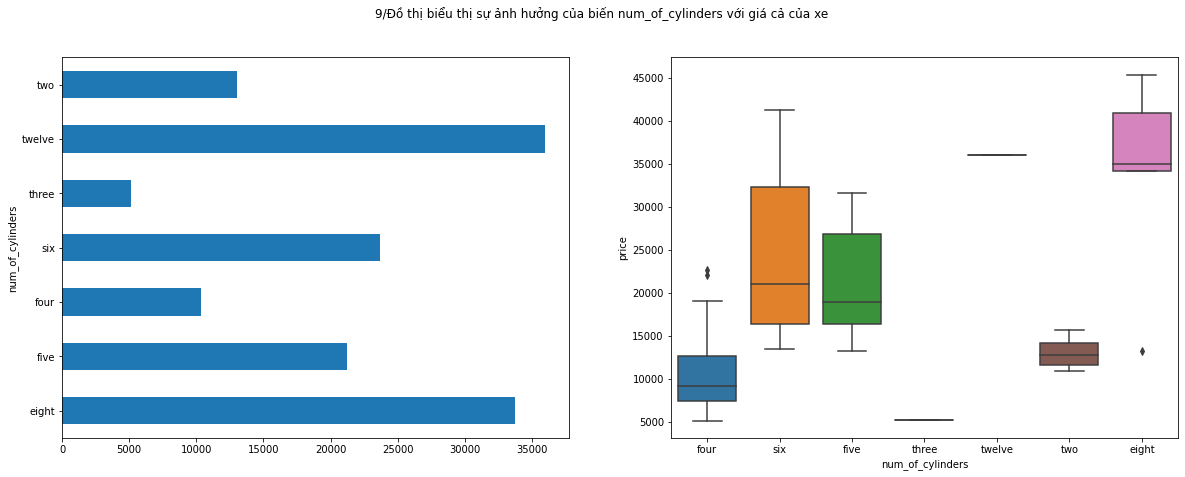

10/ price ảnh hưởng đáng kể tới fuel_system Với P_value = 1.8657347748825717e-15


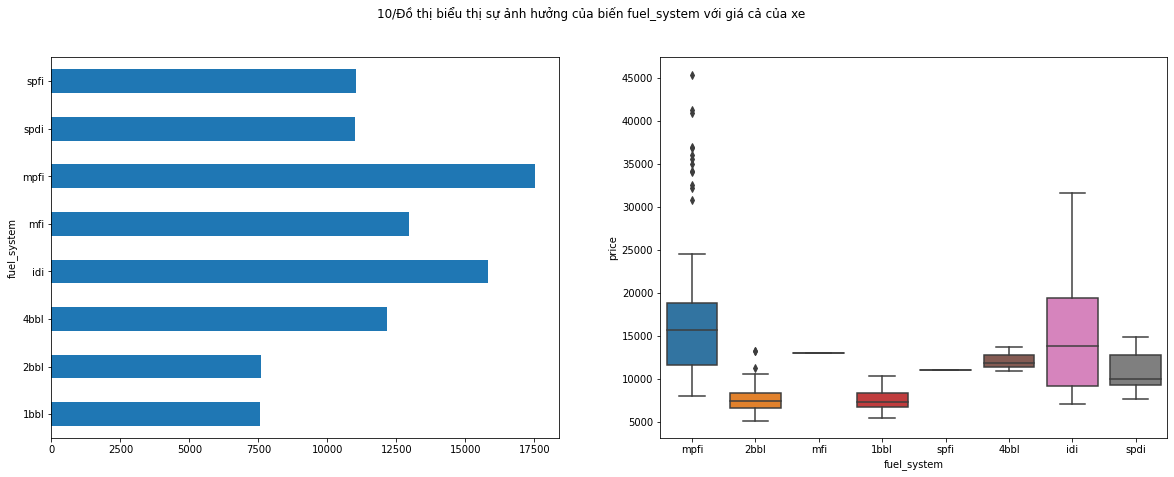

11/ price ảnh hưởng đáng kể tới symboling Với P_value = 6.1472762793296225e-06


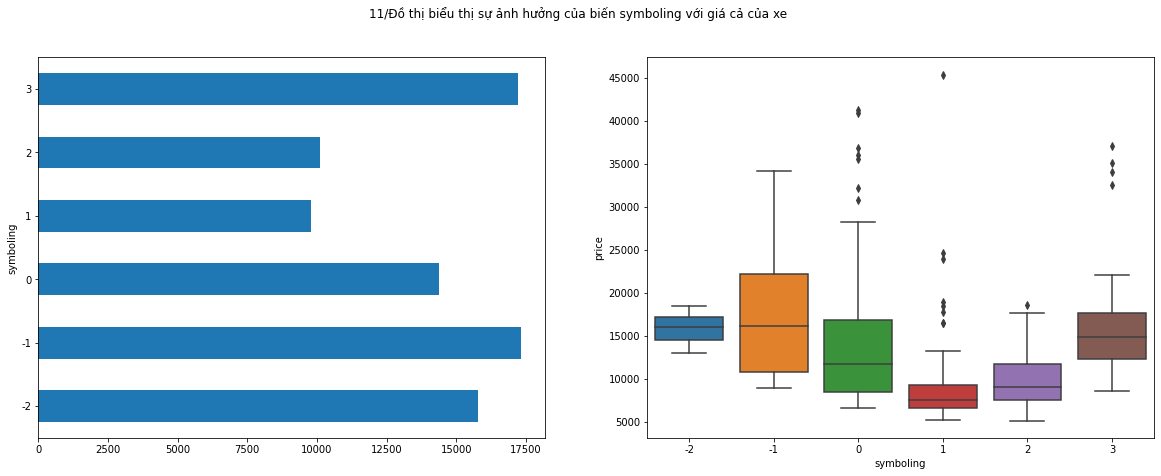

In [30]:
t = 1
for i in lst_categ:
    plt.figure(figsize=(20,7))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    str1 = "price ~ C("+i+")"
    model = ols(str1,data=df_Automobile).fit()
    anova_table = sm.stats.anova_lm(model)
    avg_price = df_Automobile[[i,'price']].groupby(i).mean().rename(columns={'price':(i +'_avg_price')})
    avg_price.plot(kind='barh',legend=False,ax=ax1)
    plt.suptitle(str(t) + "/Đồ thị biểu thị sự ảnh hưởng của biến "+i +" với giá cả của xe")
    plt.xlabel(i + " effect to Avg Price (Dollars)")
    if anova_table["PR(>F)"][0] < 0.05:
      print(str(t) + "/ price" + " ảnh hưởng đáng kể tới "+i+" Với P_value = "+str(anova_table["PR(>F)"][0]))
      sns.boxplot(data=df_Automobile,x=i,y="price",ax=ax2)
    else:
      print(str(t) + "/ price" + " không ảnh hưởng đáng kể tới "+i+" Với P_value = "+str(anova_table["PR(>F)"][0]))
      sns.boxplot(data=df_Automobile,x=i,y="price",ax=ax2)
    plt.show()
    t+=1

#### Nhận xét
  - Sau kiểm định ANOVA ta thấy có 9 biến có ảnh hưởng đáng kể đến Output price đó là: ["symboling","fuel_system","num_of_cylinders","engine_type,"engine_location","drive_wheels","body_style","aspiration","make"]
  - Hãng sản xuất xe có tác động tới giá trị của xe được bán ra, ta thấy có thể phân chia làm 3 nhóm chính
  - Các hãng xe có giá cao nhất là ["jaguar","mercedes-benz","bmw","porche"]
  - Xe chạy diesel có giá cao hơn xe chạy xăng
  - Động cơ có turbo ảnh hưởng đến giá cao hơn động cơ thương
  - số lượng cửa của xe không có ý nghĩa nhiều lắm tới giá trị xe
  - Xe có dạng hardtop và convertible có giá trị cao hơn các dạng xe còn lại
  - với biến drive wheels thì xe có dạng rear wheel drive có giá cao hơn 2 dạng khác.
  - Vị trí động cơ cũng có tác động mạnh đến giá trị xe khi vị trí động cơ ở rear có giá cao hơn ở front
  - Số lượng cylinder càng nhiều thì giá trị của xe cũng càng cao
  - Hệ thống nhiên liệu và dạng động cơ cũng có tác động mạnh tới giá trị của xe
  - Với biến symboling giá trị xe thấp đối với các nhóm có symbling là 0,1,2 

### Phân tích mối liên hệ các biến phân loại với nhau
  - Ta thấy có tổng cộng là 11 biến phân loại nên sẽ có tổ hợp 2 của 11 là 55 cặp biến.
  - Xem dữ liệu bằng crosstab và mô hình hóa bằng stacked bar để xem tương quan của dữ liệu.
  - Kiểm định chi2 để xem thử 2 biến là độc lập hay phụ thuộc làm cơ sở để ta chọn các biến khi dự đoán mô hình.
             


In [31]:
# đếm dữ liệu giữa 2 biến
k = 0
t = 1
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_Automobile[lst_categ[m]],df_Automobile[lst_categ[n]])
    print(t,"/ Crosstab của 2 biến %s và %s" %(lst_categ[m],lst_categ[n]),"\n",table,"\n")
    t+=1

1 / Crosstab của 2 biến make và fuel_type 
 fuel_type      diesel  gas
make                      
alfa-romero         0    3
audi                0    7
bmw                 0    8
chevrolet           0    3
dodge               0    9
honda               0   13
isuzu               0    4
jaguar              0    3
mazda               2   15
mercedes-benz       4    4
mercury             0    1
mitsubishi          0   13
nissan              1   17
peugot              5    6
plymouth            0    7
porsche             0    5
renault             0    2
saab                0    6
subaru              0   12
toyota              3   29
volkswagen          4    8
volvo               1   10 

2 / Crosstab của 2 biến make và aspiration 
 aspiration     std  turbo
make                     
alfa-romero      3      0
audi             5      2
bmw              8      0
chevrolet        3      0
dodge            6      3
honda           13      0
isuzu            4      0
jaguar           3      0
m

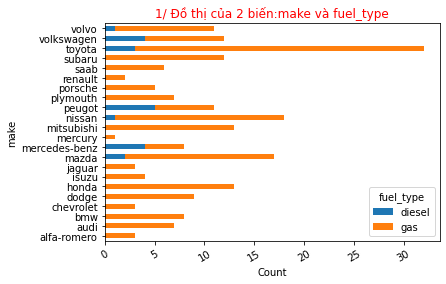

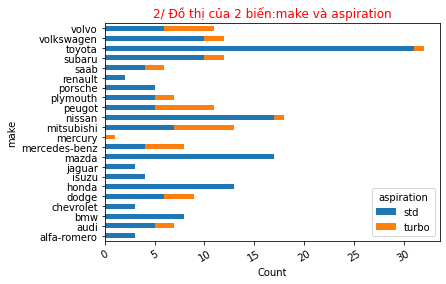

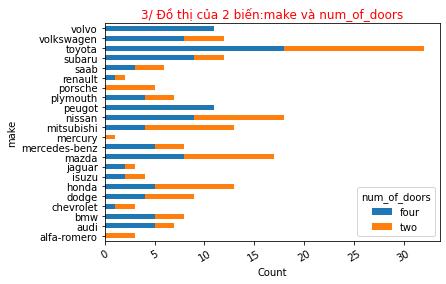

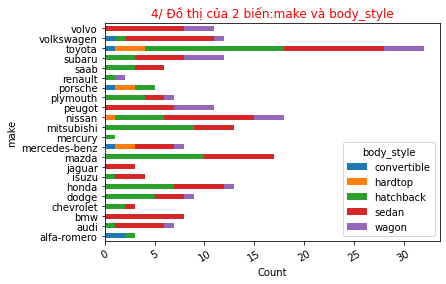

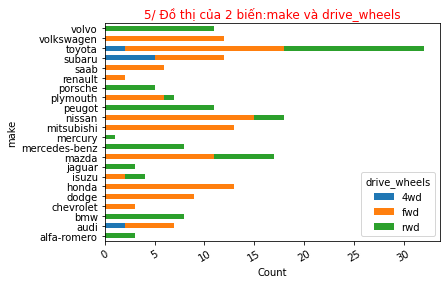

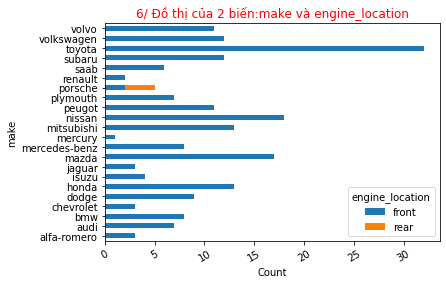

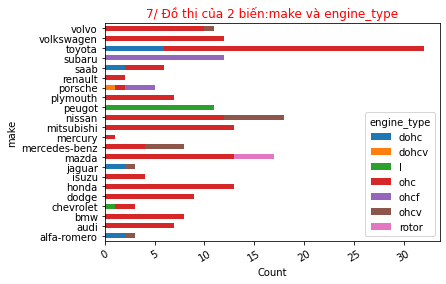

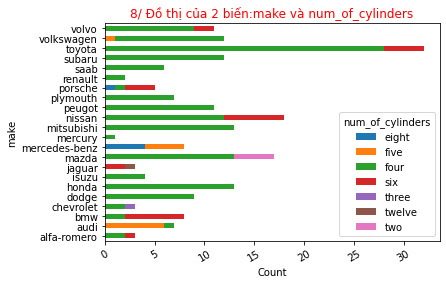

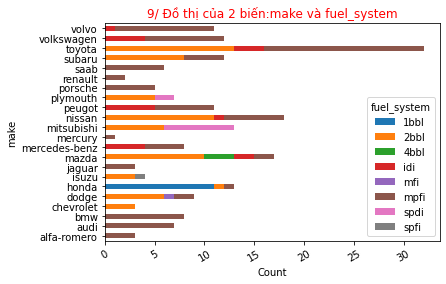

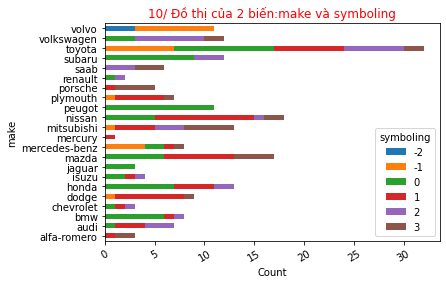

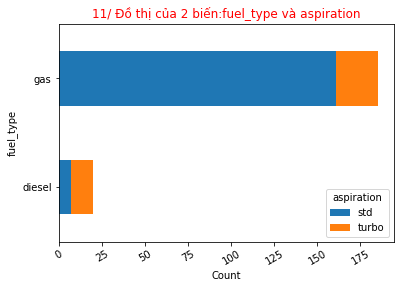

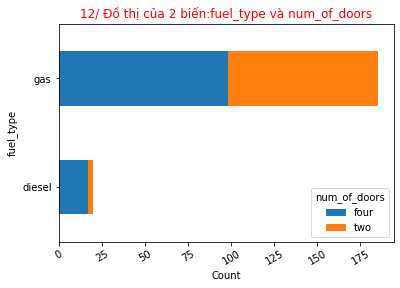

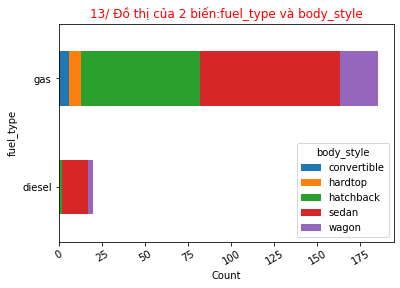

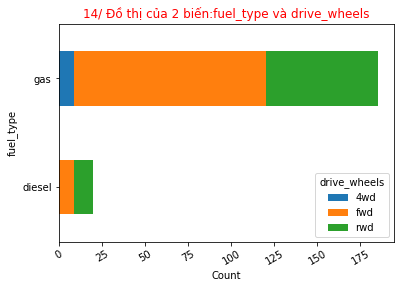

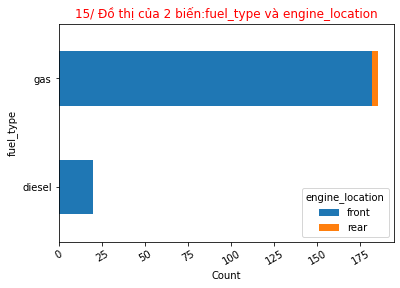

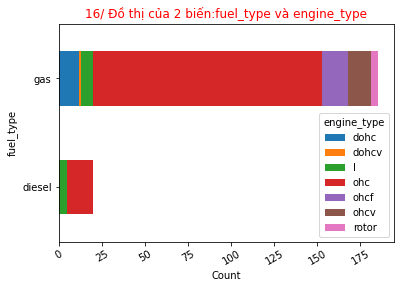

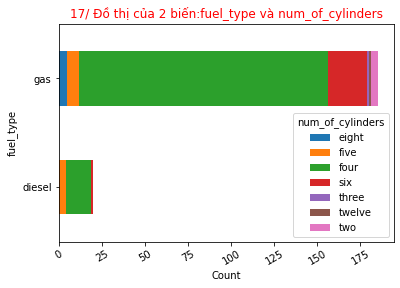

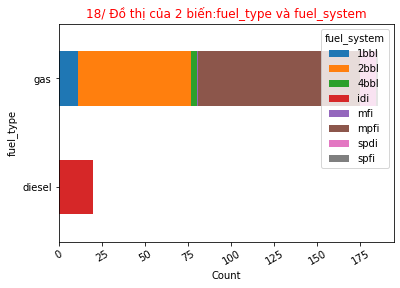

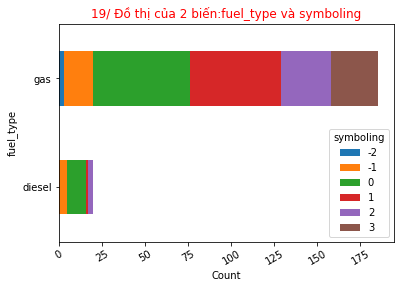

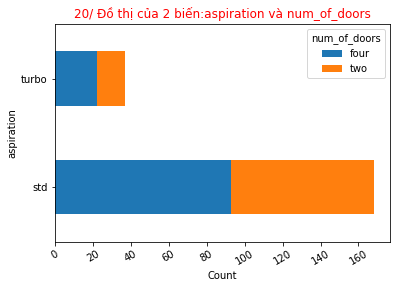

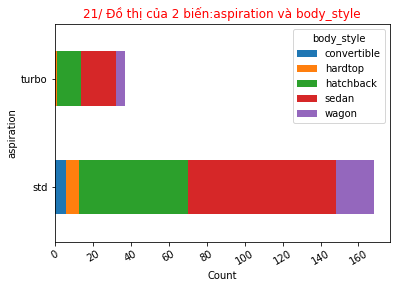

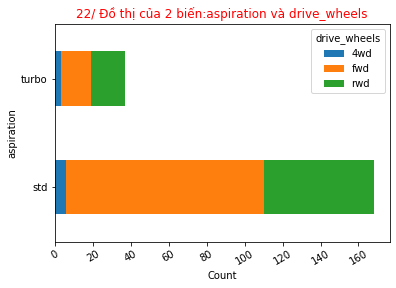

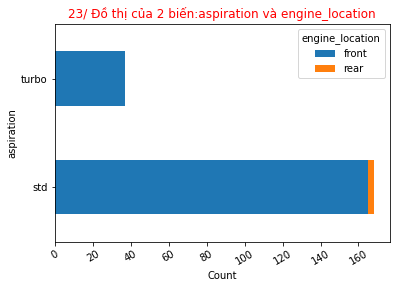

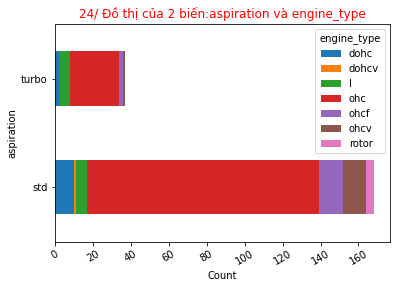

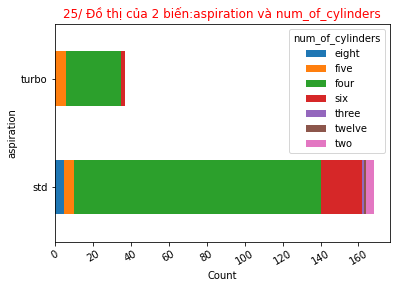

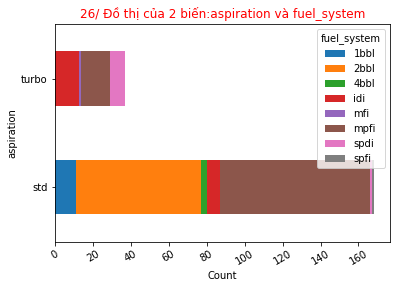

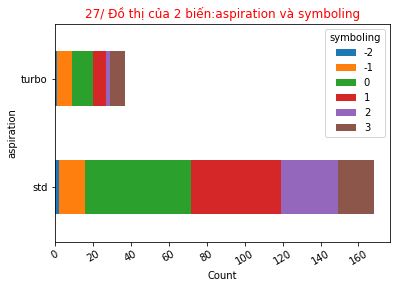

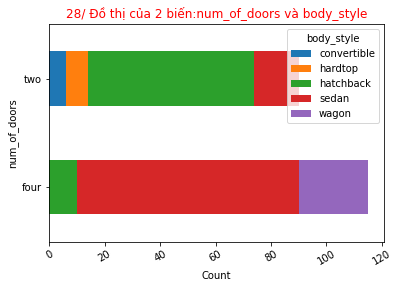

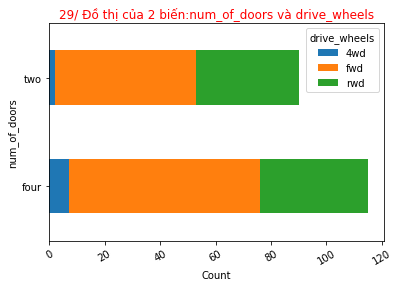

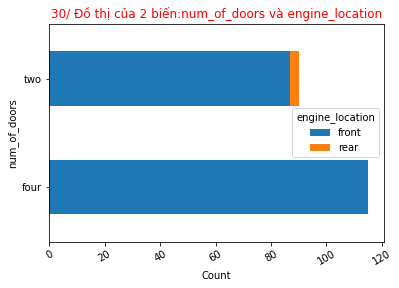

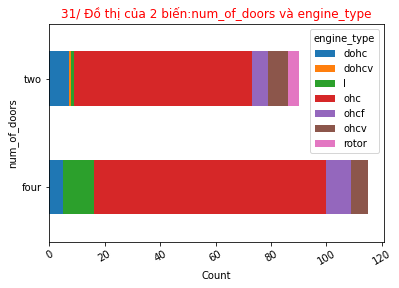

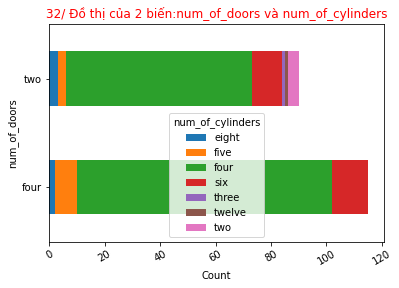

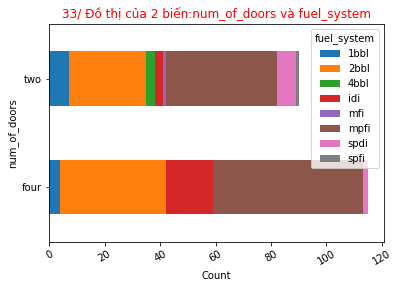

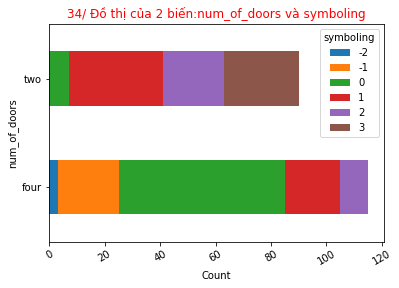

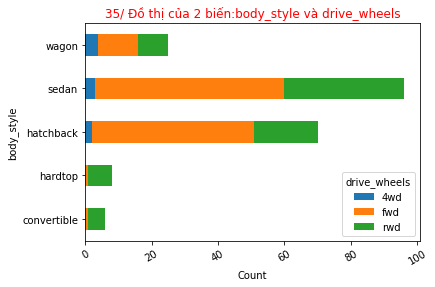

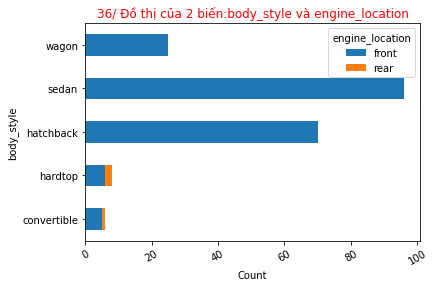

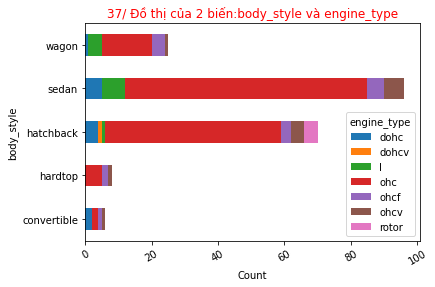

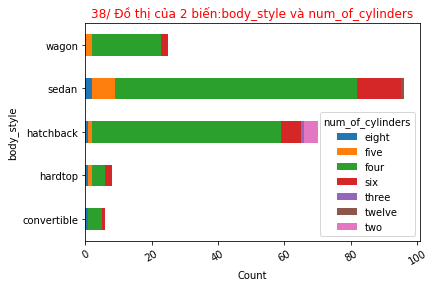

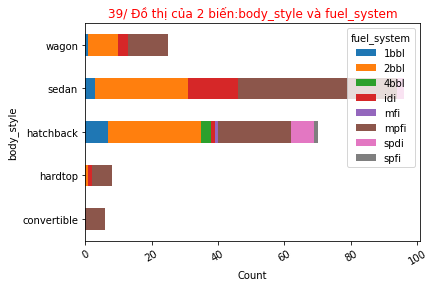

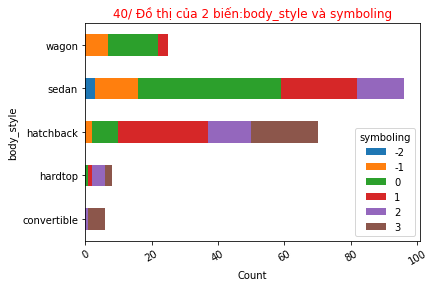

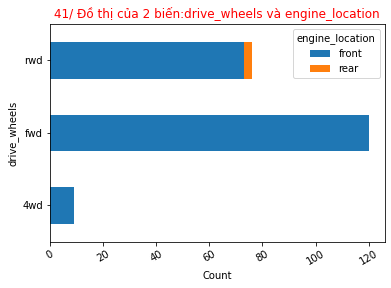

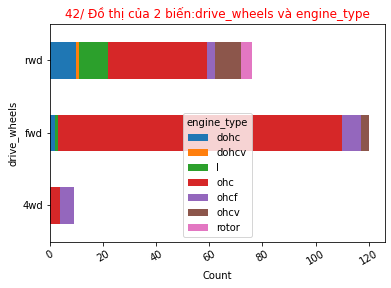

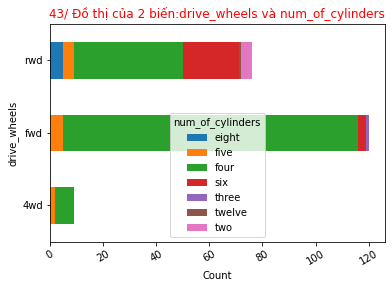

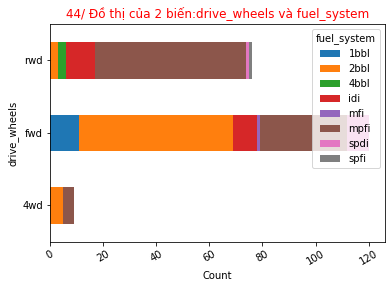

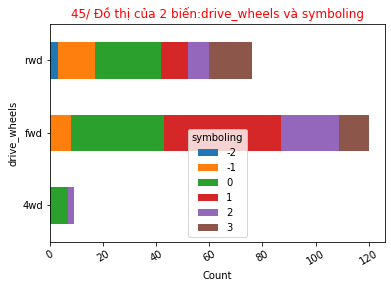

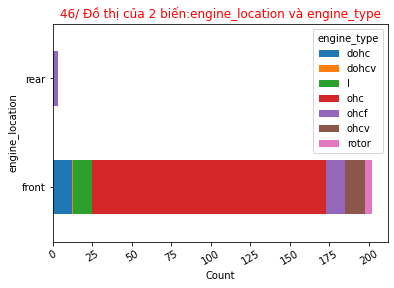

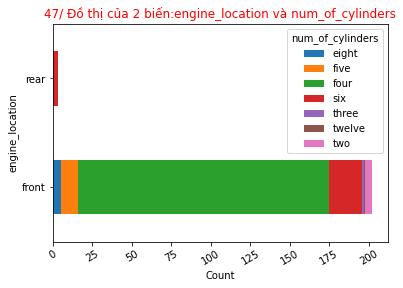

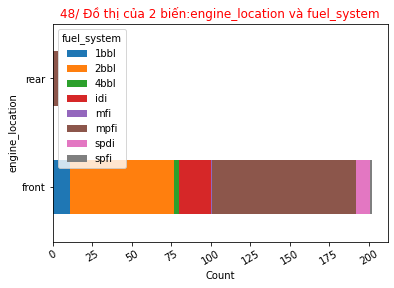

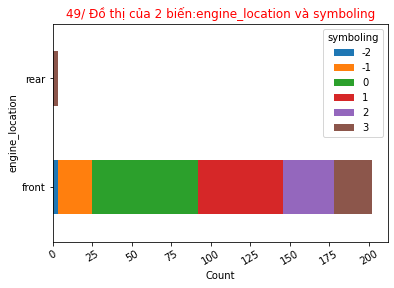

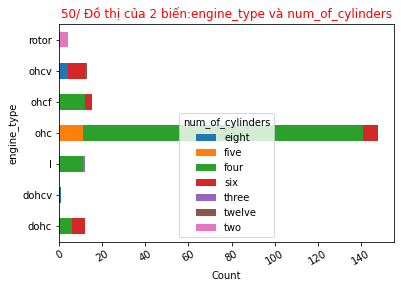

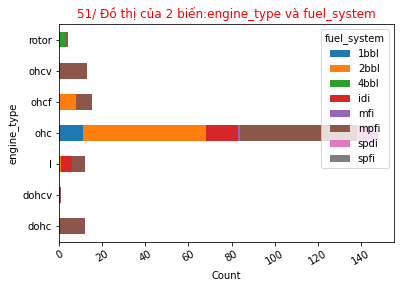

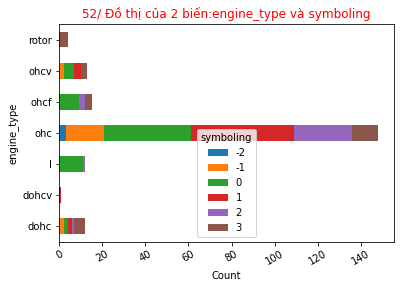

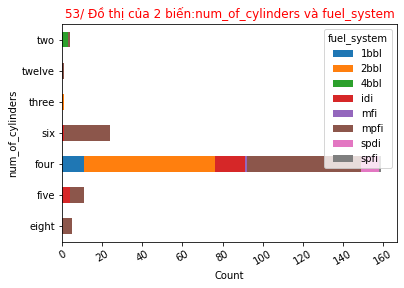

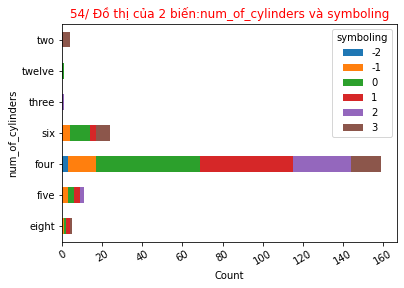

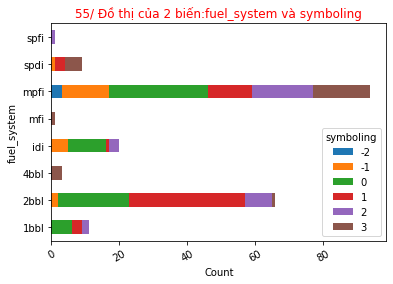

In [32]:
# Mô hình hóa dữ liệu các biến phân loại
k = 0
t = 1
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_Automobile[lst_categ[m]],df_Automobile[lst_categ[n]])
    table.plot(kind="barh",stacked=True)
    plt.title(str(t) + "/ Đồ thị của 2 biến:" + lst_categ[m] + " và " + lst_categ[n],c="red")
    t+=1
    plt.xlabel("Count")
    plt.xticks(rotation=30)
plt.show()


In [33]:
# Kiểm định Chi2 cho các biến phân loại
# H0: 2 biến độc lập
from scipy.stats import chi2_contingency,chi2
k = 0
t = 1
for m in range((len(lst_categ)-1)):
  k+=1
  for n in range(k,len(lst_categ)):
    table = pd.crosstab(df_Automobile[lst_categ[m]],df_Automobile[lst_categ[n]])
    stat,p,dof,expected = chi2_contingency(table)
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    alpha = 1.0 - prob
    if p <= alpha:
      print(t,"/ 2 biến %s và %s phụ thuộc (reject H0)" %(lst_categ[m],lst_categ[n]))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")
      t+=1
    else:
      print(t,"/ 2 biến %s và %s độc lập (không reject H0)" %(lst_categ[m],lst_categ[n]))
      print("significance= %.4f, p-value = %.4f" %(alpha,p),"\n")
      t+=1

1 / 2 biến make và fuel_type phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0005 

2 / 2 biến make và aspiration phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0001 

3 / 2 biến make và num_of_doors phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0092 

4 / 2 biến make và body_style phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

5 / 2 biến make và drive_wheels phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

6 / 2 biến make và engine_location phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

7 / 2 biến make và engine_type phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

8 / 2 biến make và num_of_cylinders phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

9 / 2 biến make và fuel_system phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

10 / 2 biến make và symboling phụ thuộc (reject H0)
significance= 0.0500, p-value = 0.0000 

11 / 2 biến fuel_type và aspiration phụ thuộc (reject 

# D.Tiền xử lý - chọn biến dự đoán mô hình Pre-processing:  Feature selection/extraction
  - Ta lựa chọn các biến phân loại có ảnh hưởng mạnh tới giá của biến price và các biến liên tục có tương quan mạnh tới biến price:
  Feature_selection_lst = ["length","curb-weight","engine-size","horsepower","city-mgp","highway-mgp","make","fuel-type","aspiration",'body-style',"drive-wheels",'engine-location','engine-type',
 'num-of-cylinders','fuel-system']
  - Sử dụng label_encoder hoặc one_hot_encoder (dummies) để xử lý các biến định tính sang dạng số

In [34]:
# lst biến ta sẽ lựa chọn để dự đoán cho mô hình
Feature_selection_lst = ["wheel_base","length","width","curb_weight","engine_size","horsepower",
                         "city_mpg","highway_mpg","make","fuel_type","aspiration","body_style",
                         "drive_wheels","engine_location","engine_type","num_of_cylinders",
                         "fuel_system"]

In [35]:
df_Feature = df_Automobile[Feature_selection_lst]
df_Feature.head()

,wheel_base,length,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,88.6,168.8,64.1,2548,130,111.0,21,27,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
1,88.6,168.8,64.1,2548,130,111.0,21,27,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
2,94.5,171.2,65.5,2823,152,154.0,19,26,alfa-romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,99.8,176.6,66.2,2337,109,102.0,24,30,audi,gas,std,sedan,fwd,front,ohc,four,mpfi
4,99.4,176.6,66.4,2824,136,115.0,18,22,audi,gas,std,sedan,4wd,front,ohc,five,mpfi


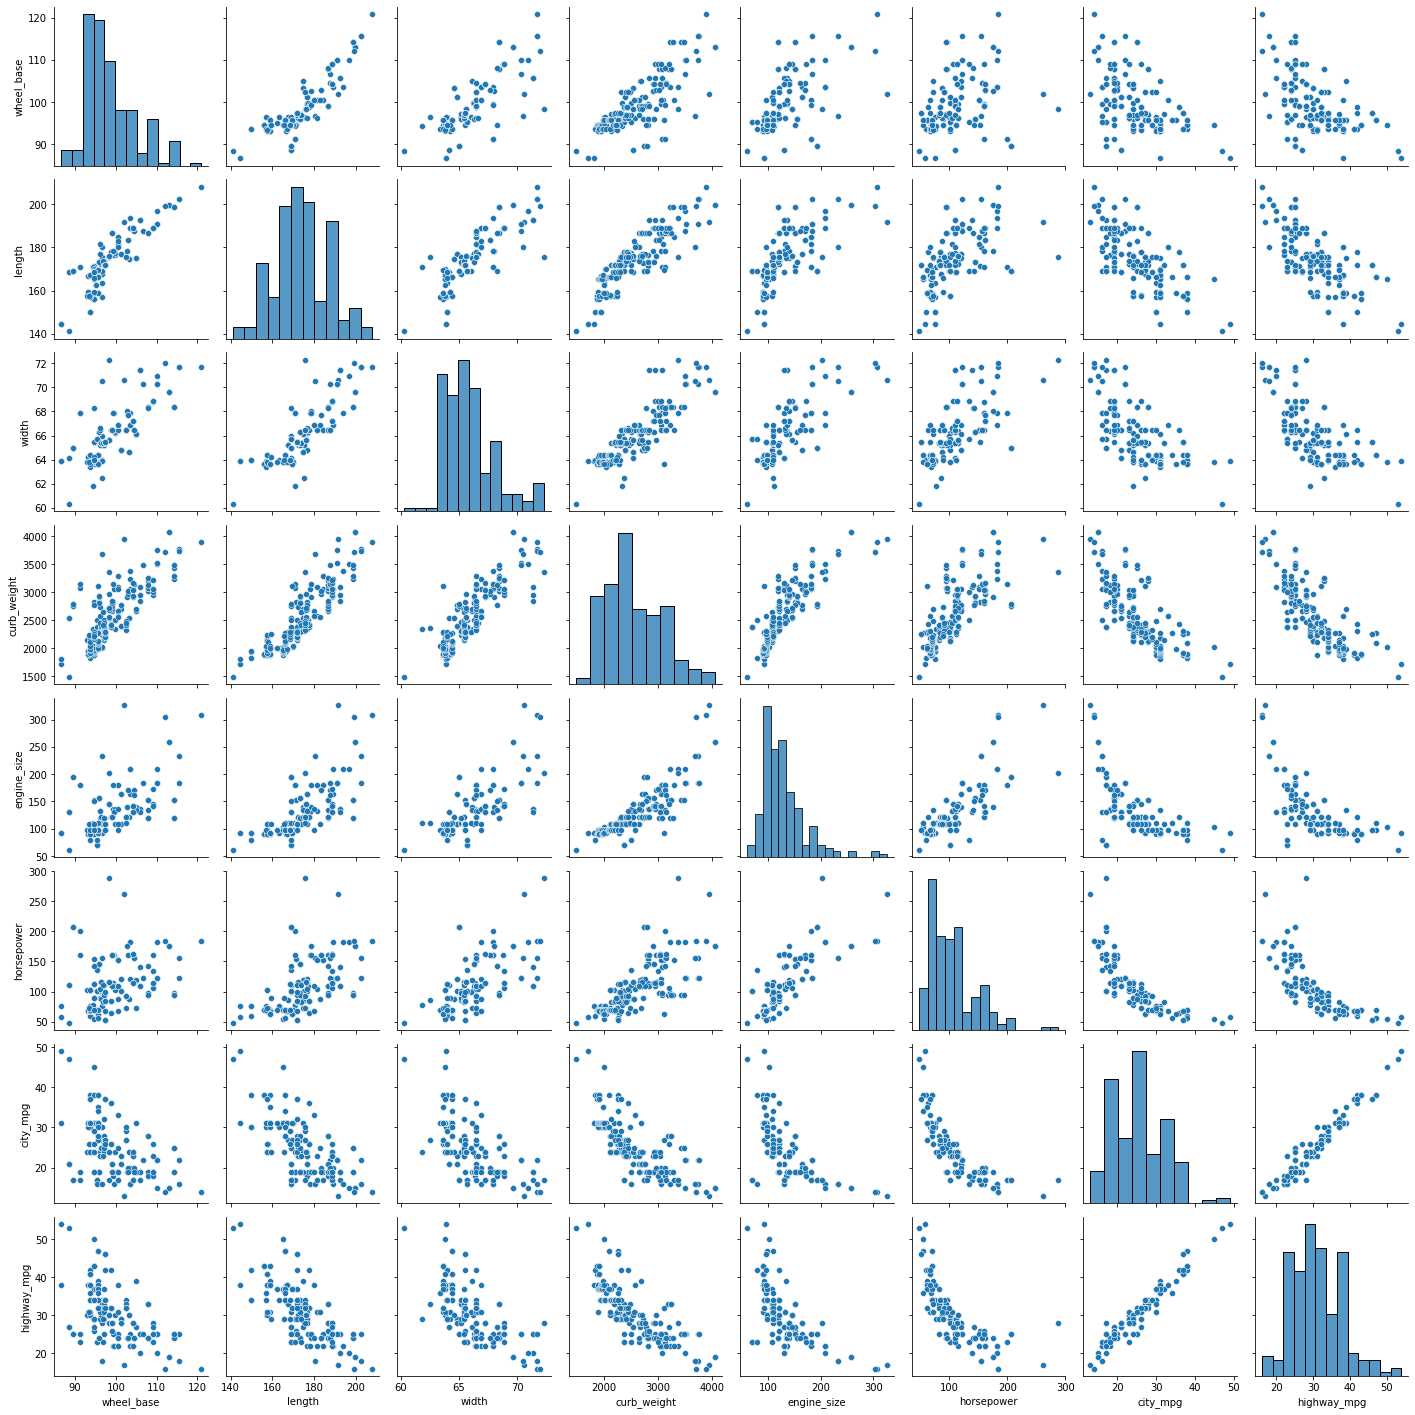

In [36]:
sns.pairplot(df_Feature)
plt.show()

In [37]:
# one_hot_encode
df = pd.get_dummies(df_Feature, prefix="C",drop_first = True)
df.shape

(205, 57)

In [38]:
df.head()

,wheel_base,length,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,C_audi,C_bmw,C_chevrolet,C_dodge,C_honda,C_isuzu,C_jaguar,C_mazda,C_mercedes-benz,C_mercury,C_mitsubishi,C_nissan,C_peugot,C_plymouth,C_porsche,C_renault,C_saab,C_subaru,C_toyota,C_volkswagen,C_volvo,C_gas,C_turbo,C_hardtop,C_hatchback,C_sedan,C_wagon,C_fwd,C_rwd,C_rear,C_dohcv,C_l,C_ohc,C_ohcf,C_ohcv,C_rotor,C_five,C_four,C_six,C_three,C_twelve,C_two,C_2bbl,C_4bbl,C_idi,C_mfi,C_mpfi,C_spdi,C_spfi
0,88.6,168.8,64.1,2548,130,111.0,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,111.0,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,154.0,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,102.0,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,115.0,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# E. CHUẨN HOA DỮ LIỆU
  - Sử dụng các dạng chuẩn hóa dữ liệu đã biết (log /StandardScaler / MinmaxScaler / RobustScaler) để chuẩn hóa.
  - Sau đó build model

In [39]:
# code
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [40]:
df.head(1)

,wheel_base,length,width,curb_weight,engine_size,horsepower,city_mpg,highway_mpg,C_audi,C_bmw,C_chevrolet,C_dodge,C_honda,C_isuzu,C_jaguar,C_mazda,C_mercedes-benz,C_mercury,C_mitsubishi,C_nissan,C_peugot,C_plymouth,C_porsche,C_renault,C_saab,C_subaru,C_toyota,C_volkswagen,C_volvo,C_gas,C_turbo,C_hardtop,C_hatchback,C_sedan,C_wagon,C_fwd,C_rwd,C_rear,C_dohcv,C_l,C_ohc,C_ohcf,C_ohcv,C_rotor,C_five,C_four,C_six,C_three,C_twelve,C_two,C_2bbl,C_4bbl,C_idi,C_mfi,C_mpfi,C_spdi,C_spfi
0,88.6,168.8,64.1,2548,130,111.0,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [41]:
df.columns

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size',
       'horsepower', 'city_mpg', 'highway_mpg', 'C_audi', 'C_bmw',
       'C_chevrolet', 'C_dodge', 'C_honda', 'C_isuzu', 'C_jaguar', 'C_mazda',
       'C_mercedes-benz', 'C_mercury', 'C_mitsubishi', 'C_nissan', 'C_peugot',
       'C_plymouth', 'C_porsche', 'C_renault', 'C_saab', 'C_subaru',
       'C_toyota', 'C_volkswagen', 'C_volvo', 'C_gas', 'C_turbo', 'C_hardtop',
       'C_hatchback', 'C_sedan', 'C_wagon', 'C_fwd', 'C_rwd', 'C_rear',
       'C_dohcv', 'C_l', 'C_ohc', 'C_ohcf', 'C_ohcv', 'C_rotor', 'C_five',
       'C_four', 'C_six', 'C_three', 'C_twelve', 'C_two', 'C_2bbl', 'C_4bbl',
       'C_idi', 'C_mfi', 'C_mpfi', 'C_spdi', 'C_spfi'],
      dtype='object')

In [42]:
lst_scaler = ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size','horsepower','city_mpg', 'highway_mpg']
lst_non_scale = ['C_audi', 'C_bmw','C_chevrolet', 'C_dodge', 'C_honda', 'C_isuzu', 'C_jaguar', 'C_mazda',
       'C_mercedes-benz', 'C_mercury', 'C_mitsubishi', 'C_nissan', 'C_peugot',
       'C_plymouth', 'C_porsche', 'C_renault', 'C_saab', 'C_subaru',
       'C_toyota', 'C_volkswagen', 'C_volvo', 'C_gas', 'C_turbo', 'C_hardtop',
       'C_hatchback', 'C_sedan', 'C_wagon', 'C_fwd', 'C_rwd', 'C_rear',
       'C_dohcv', 'C_l', 'C_ohc', 'C_ohcf', 'C_ohcv', 'C_rotor', 'C_five',
       'C_four', 'C_six', 'C_three', 'C_twelve', 'C_two', 'C_2bbl', 'C_4bbl',
       'C_idi', 'C_mfi', 'C_mpfi', 'C_spdi', 'C_spfi']

In [43]:
# Standard_scaler
X_Standard_Scaler = df[lst_scaler]
X_Standard_Scaler = preprocessing.StandardScaler().fit(X_Standard_Scaler).transform(X_Standard_Scaler)
X_Standard_Scaler

array([[-1.6907718 , -0.42652147, -0.84478235, ...,  0.17106493,
        -0.64655303, -0.54605874],
       [-1.6907718 , -0.42652147, -0.84478235, ...,  0.17106493,
        -0.64655303, -0.54605874],
       [-0.70859588, -0.23151305, -0.19056612, ...,  1.26180693,
        -0.95301169, -0.69162706],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.75448507,
        -1.10624102, -1.12833203],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.04423447,
         0.11959362, -0.54605874],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.24716321,
        -0.95301169, -0.83719538]])

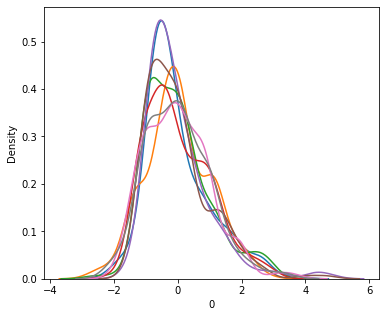

In [44]:
X_Standard_Scaler_1 = pd.DataFrame(X_Standard_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(8):
    sns.kdeplot(X_Standard_Scaler_1[i], ax=ax1)
plt.show()

In [45]:
X_Standard_Scaler_2 = pd.concat([X_Standard_Scaler_1,df[lst_non_scale]],axis=1)

In [46]:
# Robust_Scaler
X_Robust_Scaler = df[lst_scaler]
X_Robust_Scaler = preprocessing.RobustScaler().fit(X_Robust_Scaler).transform(X_Robust_Scaler)
X_Robust_Scaler

array([[-1.06329114, -0.26190476, -0.5       , ...,  0.34782609,
        -0.27272727, -0.33333333],
       [-1.06329114, -0.26190476, -0.5       , ...,  0.34782609,
        -0.27272727, -0.33333333],
       [-0.3164557 , -0.11904762,  0.        , ...,  1.2826087 ,
        -0.45454545, -0.44444444],
       ...,
       [ 1.53164557,  0.92857143,  1.21428571, ...,  0.84782609,
        -0.54545455, -0.77777778],
       [ 1.53164557,  0.92857143,  1.21428571, ...,  0.23913043,
         0.18181818, -0.33333333],
       [ 1.53164557,  0.92857143,  1.21428571, ...,  0.41304348,
        -0.45454545, -0.55555556]])

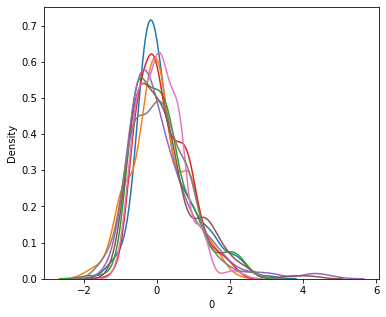

In [47]:
X_Robust_Scaler_1 = pd.DataFrame(X_Robust_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(8):
    sns.kdeplot(X_Robust_Scaler_1[i], ax=ax1)
plt.show()

In [48]:
X_Robust_Scaler_2 = pd.concat([X_Robust_Scaler_1,df[lst_non_scale]],axis=1)

In [49]:
# MinMax_Scaler
X_MinMax_Scaler = df[lst_scaler]
X_MinMax_Scaler = preprocessing.MinMaxScaler().fit(X_MinMax_Scaler).transform(X_MinMax_Scaler)
X_MinMax_Scaler

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.35833333, 0.13888889,
        0.18421053],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.24166667, 0.36111111,
        0.28947368],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.275     , 0.16666667,
        0.23684211]])

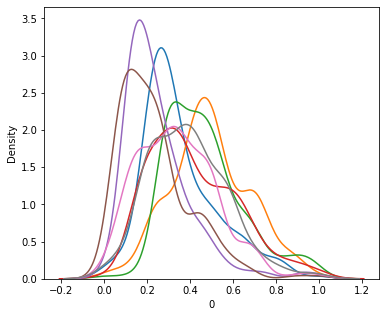

In [50]:
X_MinMax_Scaler_1 = pd.DataFrame(X_MinMax_Scaler)
f, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(6,5))
for i in range(8):
    sns.kdeplot(X_MinMax_Scaler_1[i], ax=ax1)
plt.show()

In [51]:
X_MinMax_Scaler_2 = pd.concat([X_MinMax_Scaler_1,df[lst_non_scale]],axis=1)

# F. TÁCH DỮ LIỆU TRAIN/TEST - BUILD MODEL
  - Tách dữ liệu
  - build bằng linear regression

In [52]:
# code lib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Dự đoán price bằng Simple regression với biến engine-size

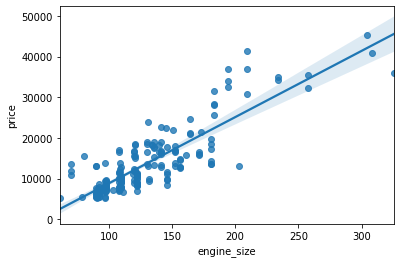

In [53]:
# Trực quan hóa 
sns.regplot(data=df_Automobile,x="engine_size",y="price")
plt.show()

In [54]:
X_simple = df_Automobile[["engine_size"]]
y_simple = df_Automobile["price"]
X_simple_train,X_simple_test,y_simple_train,y_simple_test = train_test_split(X_simple,y_simple,random_state=60,test_size=0.2)
lm_simple = LinearRegression()
lm_simple.fit(X_simple_train,y_simple_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_simple_predict = lm_simple.predict(X_simple_test)
y_simple_predict[0:5]

array([15375.70537547, 10411.19737349,  8329.30692105, 10090.90653465,
       10090.90653465])

In [56]:
y_simple_test.array[0:5]

<PandasArray>
[13415.0, 7895.0, 6849.0, 10198.0, 8013.0]
Length: 5, dtype: float64

In [57]:
# xác định hệ số a và b
a = lm_simple.intercept_
b = lm_simple.coef_[0]
print("price = ",a," + ",b,"x engine-size")

price =  -7204.798762567665  +  160.145419418716 x engine-size


In [58]:
# đánh giá model bằng R^2
print("full R-square : ",lm_simple.score(X_simple,y_simple))
print("train R-square : ",lm_simple.score(X_simple_train,y_simple_train))
print("test R-square : ",lm_simple.score(X_simple_test,y_simple_test))

full R-square :  0.7422876366707696
train R-square :  0.6931262362357293
test R-square :  0.8609519988850982


In [59]:
# MSE, MAE
mse = mean_squared_error(y_simple_test,y_simple_predict)
mae = mean_absolute_error(y_simple_test,y_simple_predict)
print("MSE của biến price và giá trị đã dữ đoán là: ",mse)
print("MAE của biến price và giá trị đã dữ đoán là: ",mae)

MSE của biến price và giá trị đã dữ đoán là:  11946884.575415926
MAE của biến price và giá trị đã dữ đoán là:  2610.1344153633163


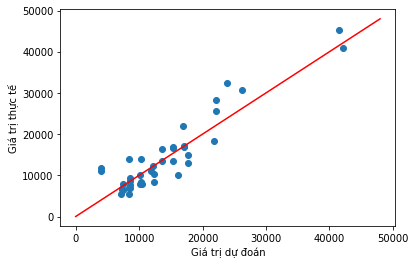

In [60]:
# trực quan hóa kết quả
plt.scatter(y_simple_predict,y_simple_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.plot([0,48000],[0,48000],'k-',c='r')
plt.show()

- Nhận vét:
  - Mô hình dự đoán với độ chính xác khoảng 74%.
  - Ta thấy mức chênh lệch giữa y dự đoán và y thực tế còn tương đối cao.
  - => ta sẽ thử các mô hình khác để tăng mức độ chính xác của mô hình

### Dự đoán price bằng multi regression
  - Ta sẽ thử multi regression với cả 3 dữ liệu đã chuẩn hóa phía trên.

#### Với Standard scaler

In [61]:
#Train model with Multiple Linear Regression
X_multi = X_Standard_Scaler_2
y_multi = df_Automobile["price"]
X_multi_train,X_multi_test,y_multi_train,y_multi_test = train_test_split(X_multi,y_multi,random_state=50,test_size=0.2)

lm_multi = LinearRegression()
lm_multi.fit(X_multi_train,y_multi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_multi_standard_predict = lm_multi.predict(X_multi_test)
y_multi_standard_predict[0:5]

array([13367.5, 12359. , 24911. , 42704. , 10972. ])

In [63]:
y_multi_test.array[0:5]

<PandasArray>
[16695.0, 11199.0, 20970.0, 40960.0, 11259.0]
Length: 5, dtype: float64

In [64]:
# xác định hệ số a và b
a = lm_multi.intercept_
b = lm_multi.coef_
str1 = ""
for i in range(15):
    str1 = str1+str(b[i])+" x "+ Feature_selection_lst[i] + " + "
print("price = ",a," + ",str1)

price =  4146546442599566.0  +  1186.4079087773264 x wheel_base + -2323.949589457253 x length + 2001.571253503726 x width + 1658.6083119181594 x curb_weight + 2676.5079630475248 x engine_size + 1572.3502875696304 x horsepower + -411.063642523334 x city_mpg + 771.2555501087159 x highway_mpg + -1128.1268086590962 x make + 5459.079612550962 x fuel_type + -4137.9344432188955 x aspiration + -4483.931860610869 x body_style + -2245.3323432229276 x drive_wheels + 99.01046220992293 x engine_location + 83.12419499430837 x engine_type + 


In [65]:
# đánh giá model bằng R^2
print("full R-square : ",lm_multi.score(X_multi,y_multi))
print("train R-square : ",lm_multi.score(X_multi_train,y_multi_train))
print("test R-square : ",lm_multi.score(X_multi_test,y_multi_test))

full R-square :  0.9501326360553322
train R-square :  0.954851359220246
test R-square :  0.9203127791810837


In [66]:
# MSE, MAE
mse = mean_squared_error(y_multi_test,y_multi_standard_predict)
mae = mean_absolute_error(y_multi_test,y_multi_standard_predict)
print("MSE của biến price và giá trị đã dữ đoán là: ",mse)
print("MAE của biến price và giá trị đã dữ đoán là: ",mae)

MSE của biến price và giá trị đã dữ đoán là:  3673474.8719512196
MAE của biến price và giá trị đã dữ đoán là:  1505.4512195121952


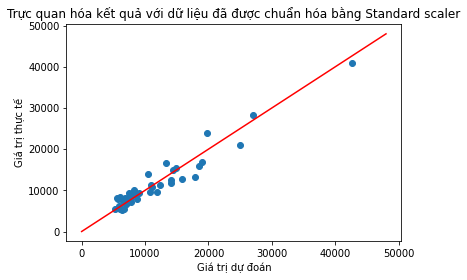

In [67]:
# trực quan hóa kết quả
plt.scatter(y_multi_standard_predict,y_multi_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.title("Trực quan hóa kết quả với dữ liệu đã được chuẩn hóa bằng Standard scaler")
plt.plot([0,48000],[0,48000],'k-',c='r')
plt.show()

- Nhận vét:
  - Mô hình dự đoán đã có cải thiện độ chính xác so với simple linear regression với độ chính xác khoảng 95% so với 74%.
  - Ta thấy mức chênh lệch giữa y dự đoán và y thực tế đã được cải thiện
  - => ta sẽ thử các mô hình khác để tăng thêm mức độ chính xác của mô hình

#### Với MinMax Scaler

In [68]:
#Train model with Multiple Linear Regression
X_multi = X_MinMax_Scaler_2
y_multi = df_Automobile["price"]
X_multi_train,X_multi_test,y_multi_train,y_multi_test = train_test_split(X_multi,y_multi,random_state=50,test_size=0.15)

lm_multi = LinearRegression()
lm_multi.fit(X_multi_train,y_multi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_multi_minmax_predict = lm_multi.predict(X_multi_test)
y_multi_minmax_predict[0:5]

array([13410., 12278., 24862., 42634., 11090.])

In [70]:
y_multi_test.array[0:5]

<PandasArray>
[16695.0, 11199.0, 20970.0, 40960.0, 11259.0]
Length: 5, dtype: float64

In [71]:
# xác định hệ số a và b
a = lm_multi.intercept_
b = lm_multi.coef_
str1 = ""
for i in range(15):
    str1 = str1+str(b[i])+" x "+ Feature_selection_lst[i] + " + "
print("price = ",a," + ",str1)

price =  -1.5437440042779158e+16  +  6323.762102882359 x wheel_base + -11872.570845462396 x length + 11280.017090280387 x width + 8762.994609494173 x curb_weight + 15901.985771152069 x engine_size + 9219.119828328661 x horsepower + -3190.4917957350594 x city_mpg + 5125.565124116349 x highway_mpg + -1352.3427818266327 x make + 5217.742289394312 x fuel_type + -4277.336792497977 x aspiration + -4609.789540853519 x body_style + -2246.7164581510715 x drive_wheels + 71.0054782457828 x engine_location + 363.74555361357875 x engine_type + 


In [72]:
# đánh giá model bằng R^2
print("full R-square : ",lm_multi.score(X_multi,y_multi))
print("train R-square : ",lm_multi.score(X_multi_train,y_multi_train))
print("test R-square : ",lm_multi.score(X_multi_test,y_multi_test))

full R-square :  0.9506363683654944
train R-square :  0.955210964405277
test R-square :  0.9209024300252207


In [73]:
# MSE, MAE
mse = mean_squared_error(y_multi_test,y_multi_minmax_predict)
mae = mean_absolute_error(y_multi_test,y_multi_minmax_predict)
print("MSE của biến price và giá trị đã dữ đoán là: ",mse)
print("MAE của biến price và giá trị đã dữ đoán là: ",mae)

MSE của biến price và giá trị đã dữ đoán là:  4316768.483870967
MAE của biến price và giá trị đã dữ đoán là:  1647.774193548387


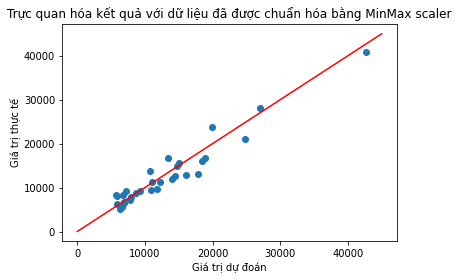

In [74]:
# trực quan hóa kết quả
plt.scatter(y_multi_minmax_predict,y_multi_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.title("Trực quan hóa kết quả với dữ liệu đã được chuẩn hóa bằng MinMax scaler")
plt.plot([0,45000],[0,45000],'k-',c='r')
plt.show()

#### Với Robust Scaler

In [75]:
#Train model with Multiple Linear Regression
X_multi = X_Robust_Scaler_2
y_multi = df_Automobile["price"]
X_multi_train,X_multi_test,y_multi_train,y_multi_test = train_test_split(X_multi,y_multi,random_state=60,test_size=0.2)

lm_multi = LinearRegression()
lm_multi.fit(X_multi_train,y_multi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_multi_robust_predict = lm_multi.predict(X_multi_test)
y_multi_robust_predict[0:5]

array([16424.06942842,  8867.24902634,  7057.32459437,  9442.76258569,
        7994.17717753])

In [77]:
y_multi_test.array[0:5]

<PandasArray>
[13415.0, 7895.0, 6849.0, 10198.0, 8013.0]
Length: 5, dtype: float64

In [78]:
# xác định hệ số a và b
a = lm_multi.intercept_
b = lm_multi.coef_
str1 = ""
for i in range(15):
    str1 = str1+str(b[i])+" x "+ Feature_selection_lst[i] + " + "
print("price = ",a," + ",str1)

price =  19781.86528717865  +  1102.441252782469 x wheel_base + -2779.351065654753 x length + 2857.11871973849 x width + 4812.442377119241 x curb_weight + 220.9809224467736 x engine_size + 1943.1248010096604 x horsepower + -186.19220811612604 x city_mpg + 607.6186195174705 x highway_mpg + -2901.8092760640775 x make + 4766.578377344124 x fuel_type + -4546.340495769822 x aspiration + -4665.2151284422325 x body_style + -3226.174639030837 x drive_wheels + -191.33732961355236 x engine_location + 2777.6044637005825 x engine_type + 


In [79]:
# đánh giá model bằng R^2
print("full R-square : ",lm_multi.score(X_multi,y_multi))
print("train R-square : ",lm_multi.score(X_multi_train,y_multi_train))
print("test R-square : ",lm_multi.score(X_multi_test,y_multi_test))

full R-square :  0.9389420063610822
train R-square :  0.949446822483551
test R-square :  0.9103879319565397


In [80]:
# MSE, MAE
mse = mean_squared_error(y_multi_test,y_multi_robust_predict)
mae = mean_absolute_error(y_multi_test,y_multi_robust_predict)
print("MSE của biến price và giá trị đã dữ đoán là: ",mse)
print("MAE của biến price và giá trị đã dữ đoán là: ",mae)

MSE của biến price và giá trị đã dữ đoán là:  7699391.75605167
MAE của biến price và giá trị đã dữ đoán là:  1867.7795250744164


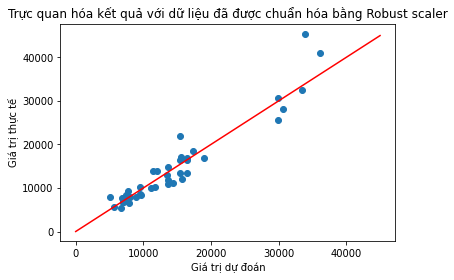

In [81]:
# trực quan hóa kết quả
plt.scatter(y_multi_robust_predict,y_multi_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.title("Trực quan hóa kết quả với dữ liệu đã được chuẩn hóa bằng Robust scaler")
plt.plot([0,45000],[0,45000],'k-',c='r')
plt.show()

### Dự đoán price bằng Pylynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures


In [83]:
# Chọn các biến có mối tương quan mạnh với biến price để build model
lst_Feature = ["width","curb_weight","engine_size","horsepower","highway_mpg","city_mpg"]
X_feature = df_Automobile[lst_Feature]
y_feature = df_Automobile["price"]

In [84]:
pr = PolynomialFeatures(degree=2)
pr_X = pr.fit_transform(X_feature)
pr_y = y_feature
X_feature.shape,pr_X.shape

((205, 6), (205, 28))

In [85]:
#Train model
X_pr_train,X_pr_test,y_pr_train,y_pr_test = train_test_split(pr_X,pr_y,random_state=100,test_size=0.2)

lm_t = LinearRegression()
lm_t.fit(X_pr_train,y_pr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pr_predict = lm_t.predict(X_pr_test)
y_pr_predict[0:5]

array([ 6363.00765086,  8422.09263371, 10429.39050025,  8566.30218633,
        7076.59984779])

In [87]:
# đánh giá model bằng R^2
print("full R-square : ",lm_t.score(pr_X,pr_y))
print("train R-square : ",lm_t.score(X_pr_train,y_pr_train))
print("test R-square : ",lm_t.score(X_pr_test,y_pr_test))

full R-square :  0.8990949563805049
train R-square :  0.8917169074029823
test R-square :  0.9132352314305692


In [88]:
# MSE, MAE
mse = mean_squared_error(y_pr_test,y_pr_predict)
mae = mean_absolute_error(y_pr_test,y_pr_predict)
print("MSE của biến price và giá trị đã dữ đoán là: ",mse)
print("MAE của biến price và giá trị đã dữ đoán là: ",mae)

MSE của biến price và giá trị đã dữ đoán là:  6684251.900228664
MAE của biến price và giá trị đã dữ đoán là:  1914.9079321512495


# G. REPORT - Lựa chọn mô hình


| Model          | R^2 full dataset | R^2 test dataset |MAE|
|--------------------|---------|----------|------|
| Simple linear Regression | ~0.74       | ~0.86        | ~2610|
| Multi linear with Standard scaler | ~0.95       | ~0.92        | ~1505|
| Multi linear with Minmax scaler | ~0.95       | ~0.92        | ~1647|
| Multi linear with Robust scaler | ~0.94       | ~0.91        | ~1867.8|
| Pylynomial Regression | ~0.899       | ~0.91        | ~1914.9|



### Kết luân:
  - Ta thấy trong các model đã build ta thấy việc áp dụng Multiple Linear Regression với dữ liệu được chuẩn hóa bằng Standard scaler cho độ chính xác tốt hơn. 
  - Tuy nhiên 95% đối với dự đoán số lượng lỡn dữ liệu và độ lệch giữa giá trị dự đoán và giá trị thực tế trung bình vẫn hơn 1500$ thì ta vẫn cần phải cải thiện model hơn nữa. 
  - => Cần thử thêm các model khác để so sánh tính hiệu quả so với các model đã build.
  - => Cần xem xét lựa chọn thêm nhiều thuộc tính hơn khi xây dựng model
  - => Cần thu thập dữ liệu nhiều hơn để thực hiện build model.